In [9]:
import pandas as pd

train_labels=pd.read_csv('train_labels.csv')

In [10]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import math

%matplotlib inline

batch_size = 1000
epochs = 20
num_classes = 211

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

import pandas as pd
import json


In [11]:
labels=train_labels['sports'].unique()

In [12]:
len(labels)

22

In [13]:
testing_data=pd.read_csv('test_images_list.csv')

In [14]:
freq=[]
for name in labels:
  count=0
  for key in train_labels['sports']:
    if(key==name):
      count+=1
  freq.append(count)

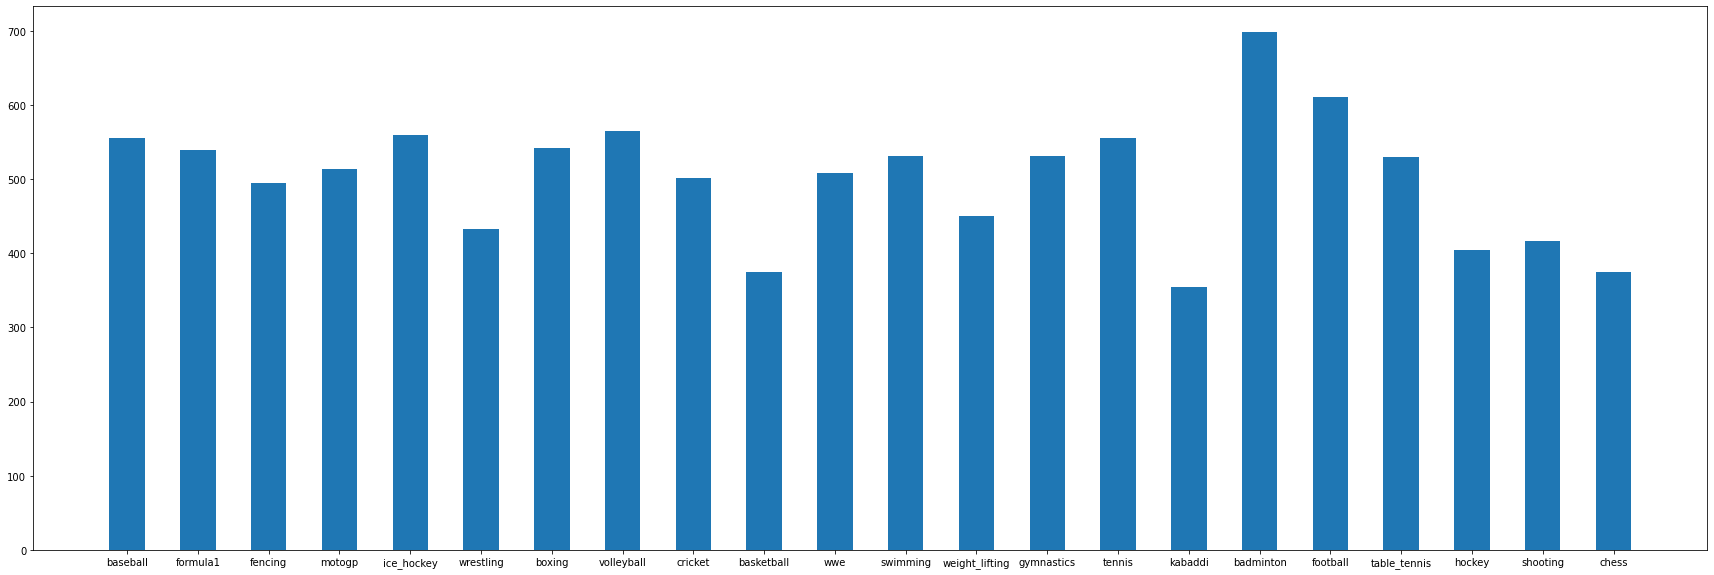

In [15]:
plt.figure(figsize=(30,10))
plt.bar(labels,freq,width=0.5)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_labels,Y_labels=train_test_split(train_labels,test_size=0.2,random_state=42)

In [18]:
X_labels

image        sports
2791  ./train/2791.jpg    ice_hockey
2992  ./train/2992.jpg        hockey
1606  ./train/1606.jpg        boxing
4184  ./train/4184.jpg       cricket
2239  ./train/2239.jpg    volleyball
...                ...           ...
5734  ./train/5734.jpg      baseball
5191  ./train/5191.jpg     badminton
5390  ./train/5390.jpg    gymnastics
860    ./train/860.jpg  table_tennis
7270  ./train/7270.jpg        hockey

[8832 rows x 2 columns]

In [19]:
Y_labels

image        sports
9733    ./train/9733.jpg      baseball
11000  ./train/11000.jpg        hockey
2447    ./train/2447.jpg    basketball
8206    ./train/8206.jpg           wwe
10688  ./train/10688.jpg        tennis
...                  ...           ...
4112    ./train/4112.jpg  table_tennis
1349    ./train/1349.jpg  table_tennis
2458    ./train/2458.jpg     badminton
4551    ./train/4551.jpg      formula1
8185    ./train/8185.jpg           wwe

[2208 rows x 2 columns]

In [20]:
from keras.optimizers import Adam

In [21]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=22, activation="softmax"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)     

In [22]:
model.fit_generator(generator=train_generator,
                   steps_per_epoch=100,
                   epochs=15)

NameError: name 'train_generator' is not defined

In [23]:
from keras.preprocessing import image

Y_pred = []

for idx in range(testing_data.shape[0]):
  path=testing_data['image'][idx]
  path='test'+path[1:]
  print(path)
  img = image.load_img(path=path,target_size=(dim,dim,3))
  img = image.img_to_array(img)
  test_img = img.reshape((1,dim,dim,3))
  img_class = fashion_model.predict_classes(test_img)
  prediction = img_class[0]    #change as per requirement
  Y_pred.append(prediction)

test/test/0.jpg


NameError: name 'dim' is not defined

In [24]:
from keras.preprocessing import image

img = image.load_img(path='test/test/201.jpg',target_size=(dim,dim,3))
img = image.img_to_array(img)
test_img = img.reshape((1,dim,dim,3))
img_class = fashion_model.predict_classes(test_img)

NameError: name 'dim' is not defined

In [25]:
img_class,inverted_classes[img_class[0]]

NameError: name 'img_class' is not defined

In [26]:
img = cv2.imread('test/test/201.jpg')
print(img.shape)
plt.imshow(img)

NameError: name 'cv2' is not defined

In [27]:
def get_label(pred):
  max_arg=max(pred[0])
  for j in range(len(pred[0])):
    if(pred[0][j]==max_arg):
      indx=j
  return inverted_classes.get(indx)

In [28]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [29]:
mobile = keras.applications.mobilenet.MobileNet()

In [30]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

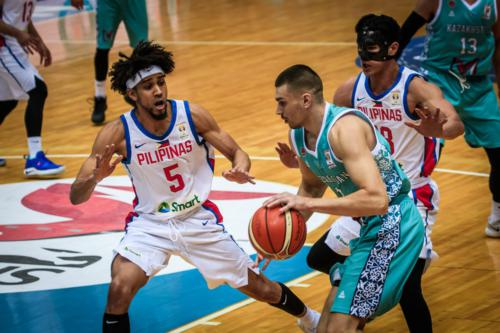

In [33]:
Image(filename='test/test/7.jpg')

In [35]:
preprocessed_image = prepare_image('test/test/7.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02802426', 'basketball', 0.9995433),
  ('n04355933', 'sunglass', 9.8425226e-05),
  ('n04336792', 'stretcher', 5.9052236e-05),
  ('n03877472', 'pajama', 5.401993e-05),
  ('n04136333', 'sarong', 4.8930164e-05)]]

In [36]:
train_labels

image      sports
0          ./train/0.jpg    baseball
1          ./train/1.jpg    formula1
2          ./train/2.jpg     fencing
3          ./train/3.jpg      motogp
4          ./train/4.jpg  ice_hockey
...                  ...         ...
11035  ./train/11035.jpg      motogp
11036  ./train/11036.jpg      motogp
11037  ./train/11037.jpg    football
11038  ./train/11038.jpg    football
11039  ./train/11039.jpg    formula1

[11040 rows x 2 columns]

In [37]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.


C:\Users\sunny\anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [38]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 5
preds=Dense(22,activation='softmax')(x) #final layer with softmax activation

In [39]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [40]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [41]:
for layer in model.layers:
    layer.trainable=False

In [42]:
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [44]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=45, 
                    width_shift_range=.15, 
                    height_shift_range=.15, 
                    horizontal_flip=True,
                    )

In [46]:
train_generator=train_datagen.flow_from_dataframe(
    dataframe=X_labels,
    directory="train",
    x_col="image",
    y_col="sports",
    class_mode="categorical",
    target_size=(224,224),
    color_mode='rgb',
    shuffle=True,
    batch_size=32
)

Found 8832 validated image filenames belonging to 22 classes.


In [47]:
validation_generator=train_datagen.flow_from_dataframe(
    dataframe=Y_labels,
    directory="train",
    x_col="image",
    y_col="sports",
    class_mode="categorical",
    target_size=(224,224),
    color_mode='rgb',
    shuffle=True,
    batch_size=32
)

Found 2208 validated image filenames belonging to 22 classes.


In [48]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_labels,
    directory="train",
    x_col="image",
    y_col="sports",
    class_mode="categorical",
    target_size=(224,224),
    color_mode='rgb',
    shuffle=True,
    batch_size=32)

Found 11040 validated image filenames belonging to 22 classes.


In [49]:
classes = train_generator.class_indices
print(classes)

{'badminton': 0, 'baseball': 1, 'basketball': 2, 'boxing': 3, 'chess': 4, 'cricket': 5, 'fencing': 6, 'football': 7, 'formula1': 8, 'gymnastics': 9, 'hockey': 10, 'ice_hockey': 11, 'kabaddi': 12, 'motogp': 13, 'shooting': 14, 'swimming': 15, 'table_tennis': 16, 'tennis': 17, 'volleyball': 18, 'weight_lifting': 19, 'wrestling': 20, 'wwe': 21}


In [50]:
inverted_classes = dict(map(reversed, classes.items()))
print(inverted_classes)

{0: 'badminton', 1: 'baseball', 2: 'basketball', 3: 'boxing', 4: 'chess', 5: 'cricket', 6: 'fencing', 7: 'football', 8: 'formula1', 9: 'gymnastics', 10: 'hockey', 11: 'ice_hockey', 12: 'kabaddi', 13: 'motogp', 14: 'shooting', 15: 'swimming', 16: 'table_tennis', 17: 'tennis', 18: 'volleyball', 19: 'weight_lifting', 20: 'wrestling', 21: 'wwe'}


In [51]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [52]:
step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                    validation_data=validation_generator,
                   epochs=3)

Epoch 1/3
345/345 [==============================] - 1172s 3s/step - loss: 1.6262 - accuracy: 0.5212 - val_loss: 1.7594 - val_accuracy: 0.4520
Epoch 2/3
345/345 [==============================] - 1228s 4s/step - loss: 1.1391 - accuracy: 0.6699 - val_loss: 1.3765 - val_accuracy: 0.5684
Epoch 3/3
345/345 [==============================] - 1345s 4s/step - loss: 0.9607 - accuracy: 0.7221 - val_loss: 1.2829 - val_accuracy: 0.5697


In [53]:
history_df = pd.DataFrame(history.history)

In [54]:
history_df

val_loss  val_accuracy      loss  accuracy
0  1.759369      0.451993  1.626190  0.521196
1  1.376473      0.568388  1.139081  0.669928
2  1.282883      0.569746  0.960654  0.722101

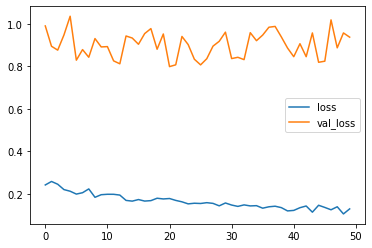

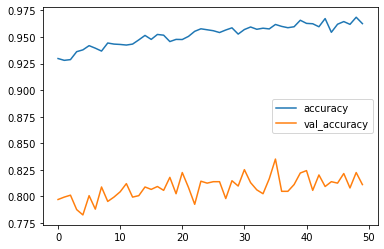

In [70]:
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

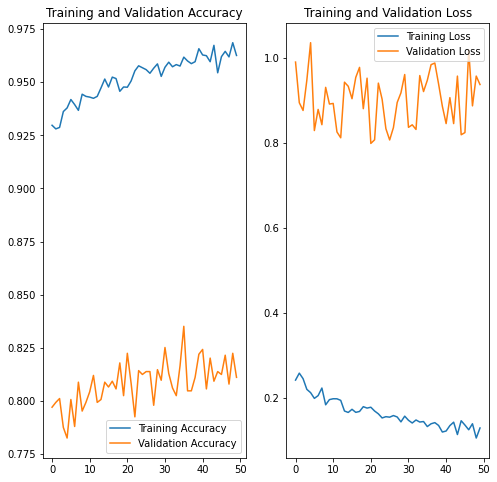

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
import matplotlib.pyplot as plt
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224,224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

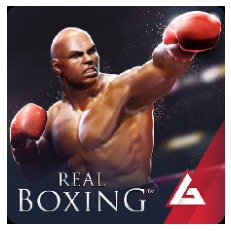

In [56]:
img_path = 'test/test/270.jpg'
new_image = load_image(img_path,True)

pred = model.predict(new_image)
#[52,78,73,111,115,162,165,3,4,5,14,15,16,124,151,202,270,285,317,394,416,458,485,560,557,856,1034,1421,1518,1528,1682,1781,2034,2199,2218,2677,2725

In [57]:
arr=[]
for name in inverted_classes.values():
  arr.append(name)

In [58]:
arr

['badminton',
 'baseball',
 'basketball',
 'boxing',
 'chess',
 'cricket',
 'fencing',
 'football',
 'formula1',
 'gymnastics',
 'hockey',
 'ice_hockey',
 'kabaddi',
 'motogp',
 'shooting',
 'swimming',
 'table_tennis',
 'tennis',
 'volleyball',
 'weight_lifting',
 'wrestling',
 'wwe']

In [59]:
prediction_classes[73] ='table_tennis'
prediction_classes[115]='motogp'
prediction_classes[165]='table_tennis'
prediction_classes[124]='ice_hockey'
prediction_classes[317]='wwe'
prediction_classes[270]='boxing'
prediction_classes[2725]='basketball'

NameError: name 'prediction_classes' is not defined

In [60]:
get_label(pred)

'boxing'

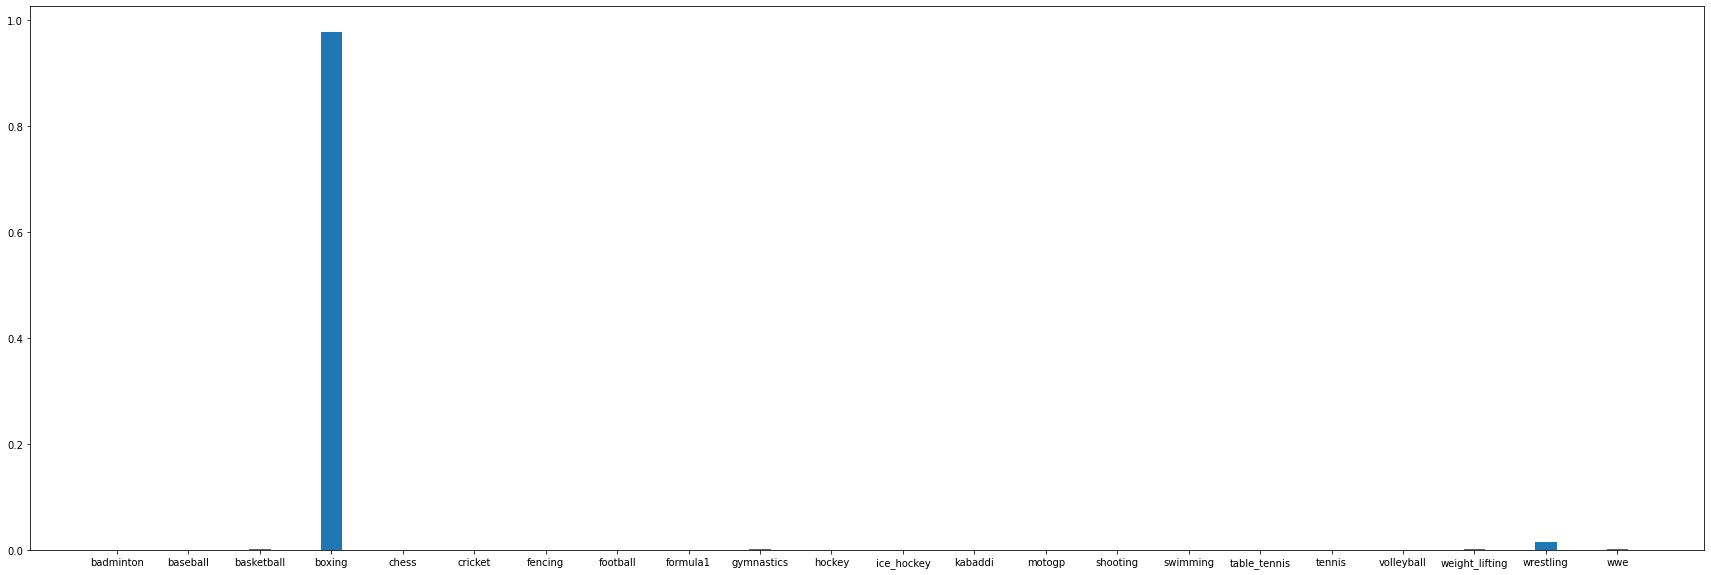

In [61]:
plt.figure(figsize=(30,10))
plt.bar(arr,pred[0],width=0.3)
plt.show()

test/test/52.jpg


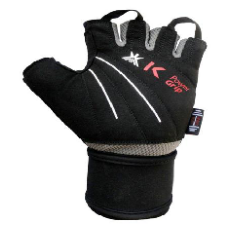

football


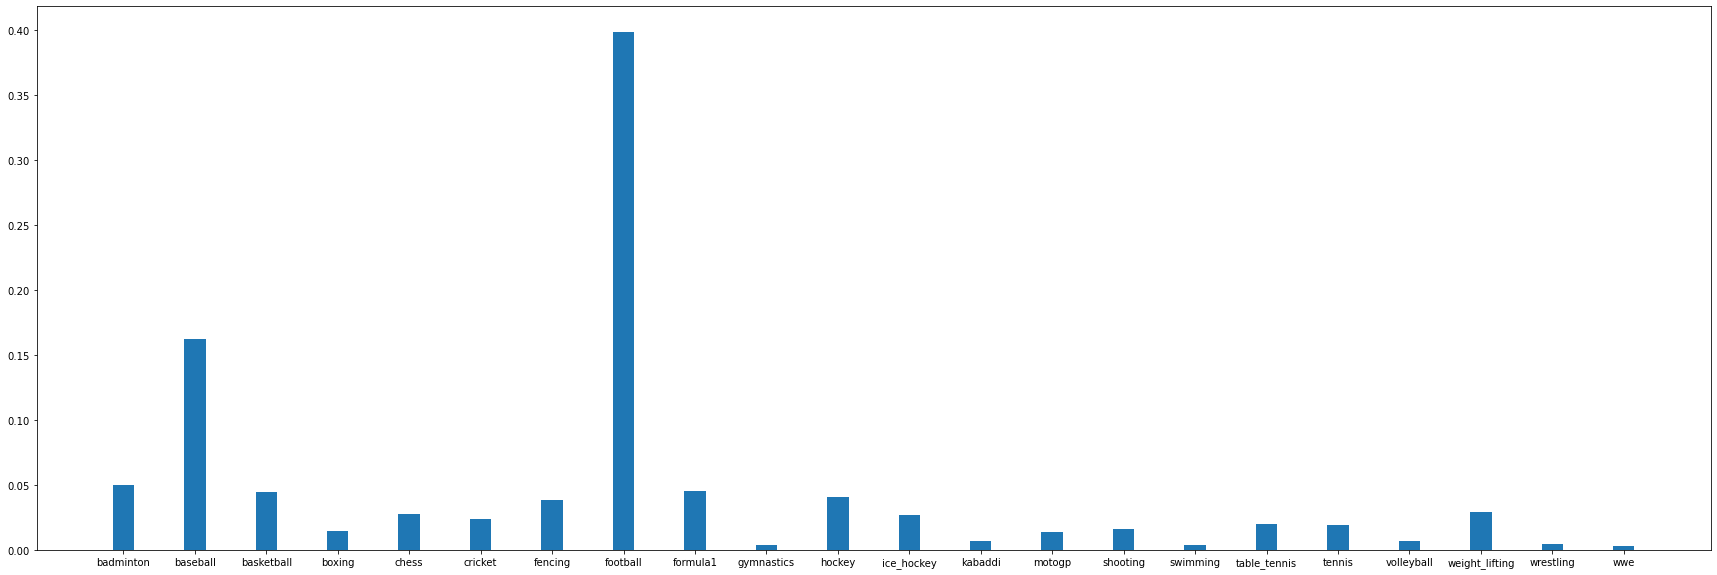

test/test/78.jpg


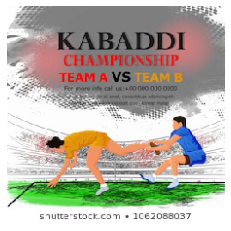

fencing


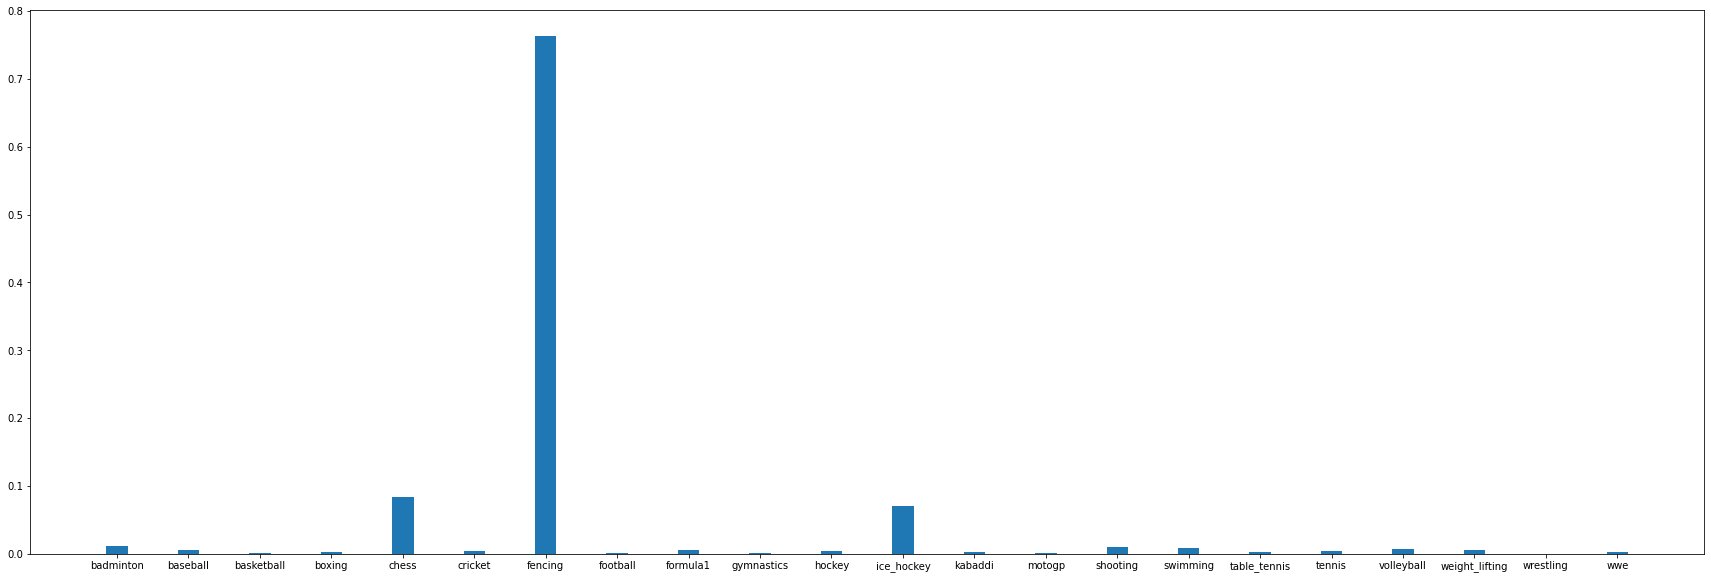

test/test/73.jpg


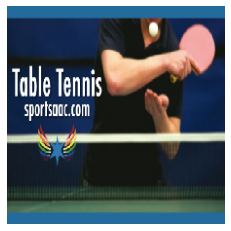

baseball


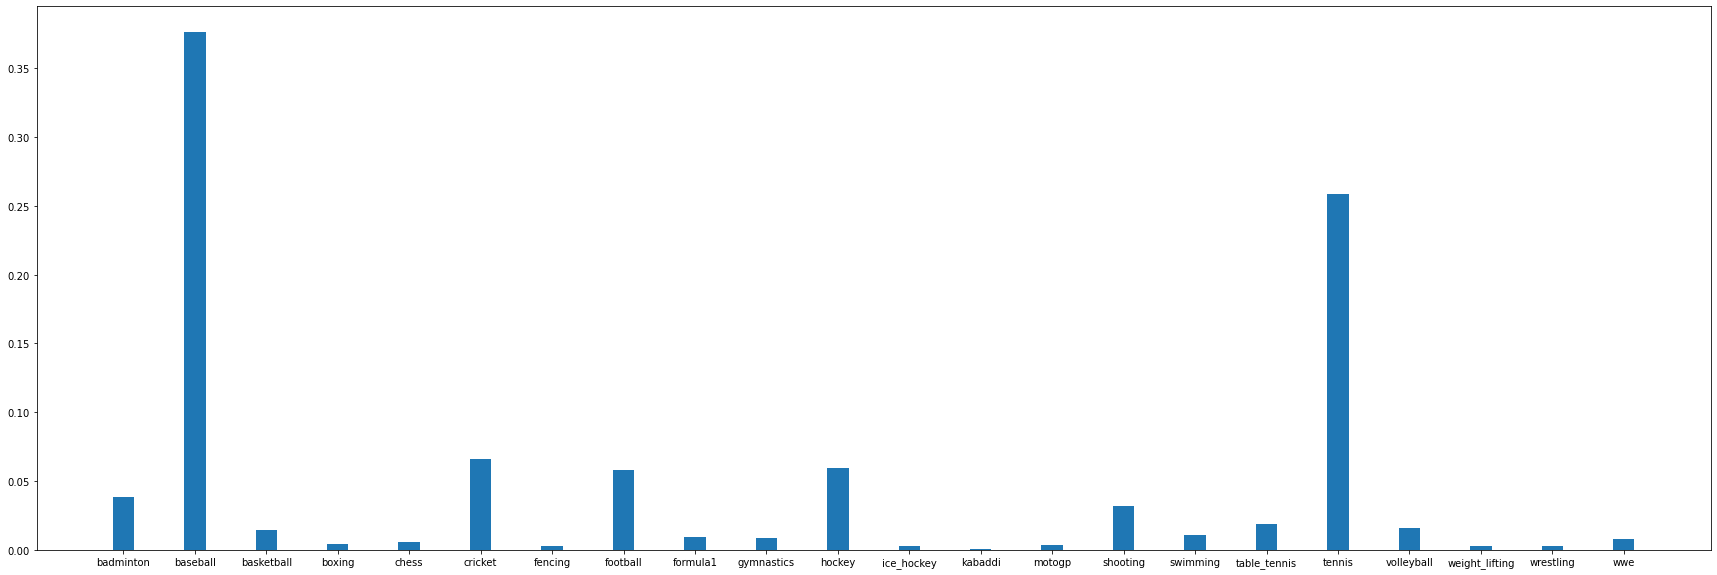

test/test/111.jpg


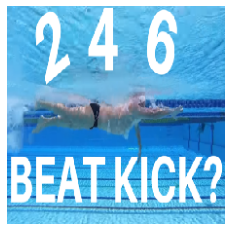

swimming


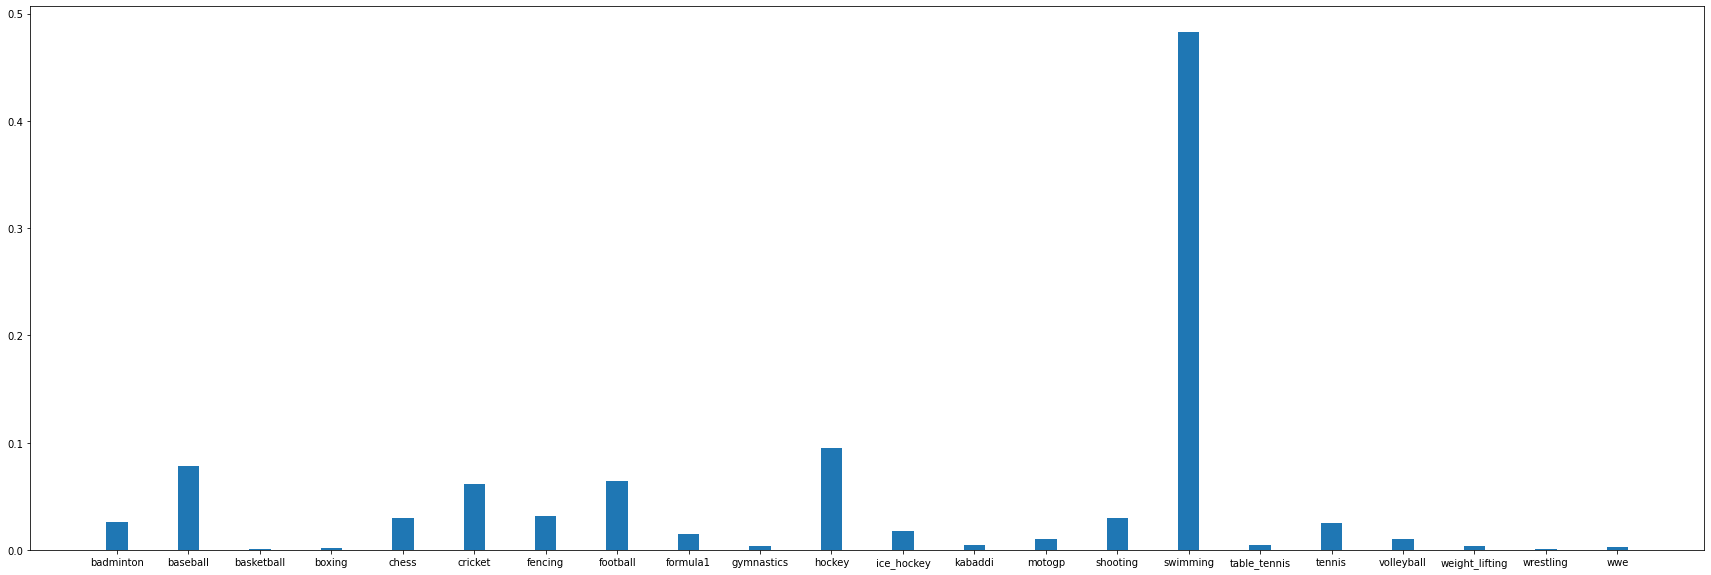

test/test/115.jpg


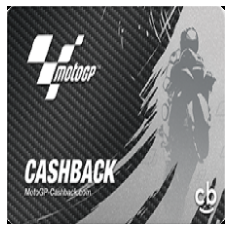

fencing


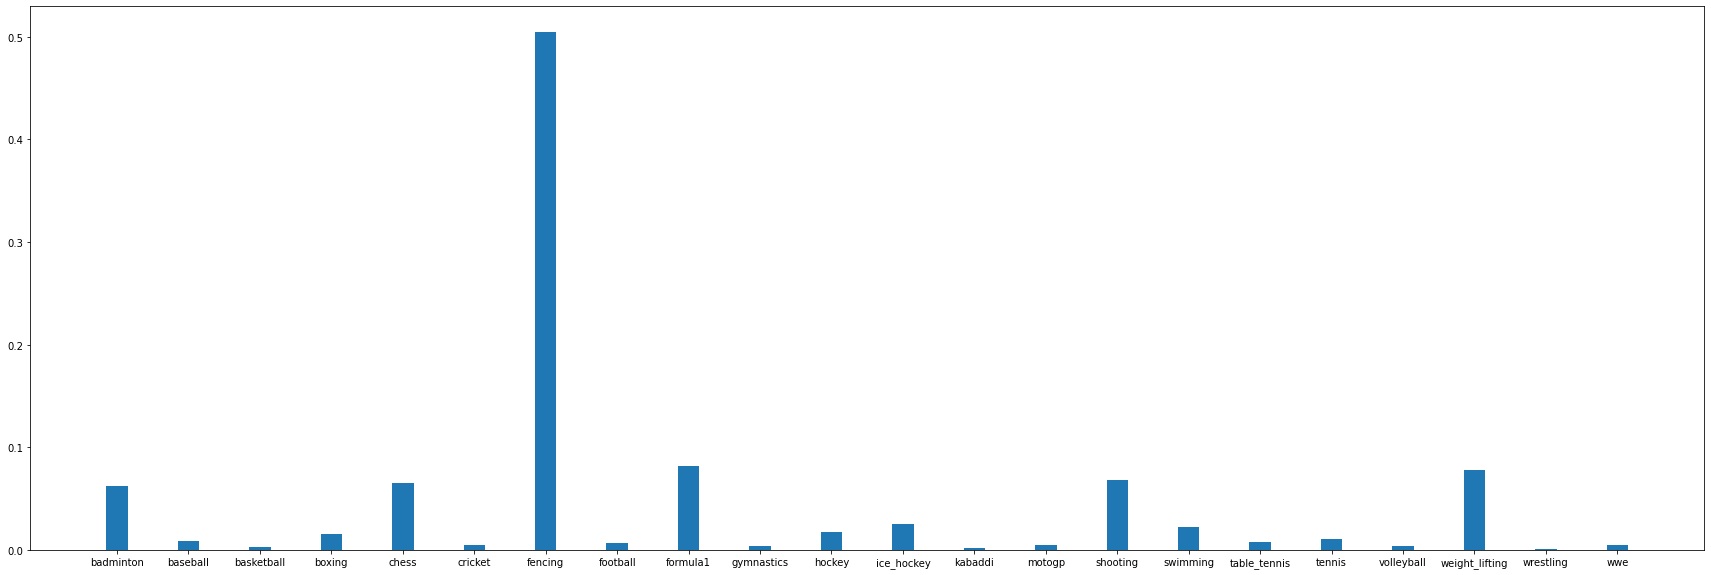

test/test/162.jpg


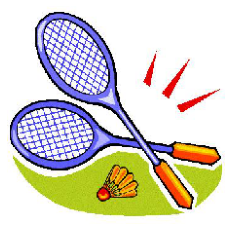

badminton


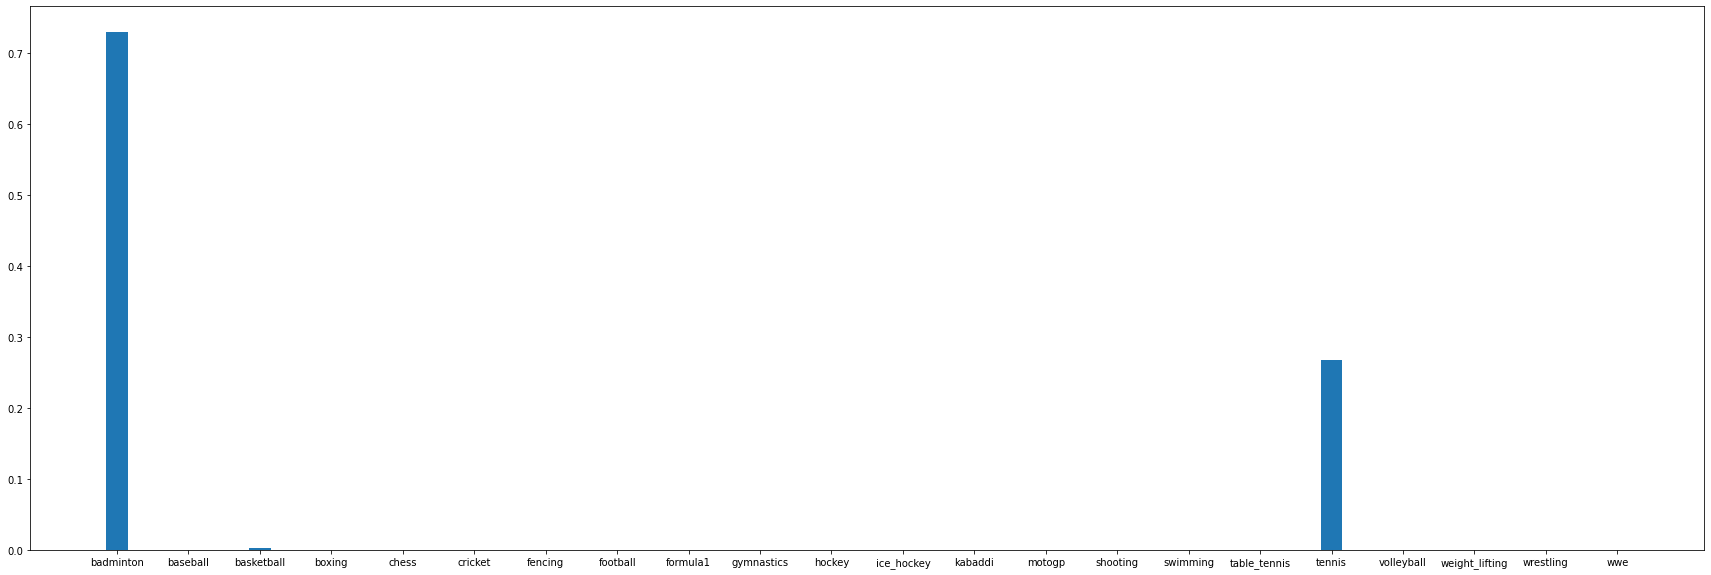

test/test/165.jpg


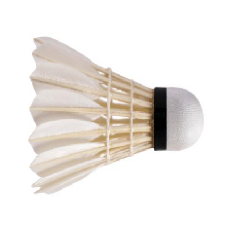

badminton


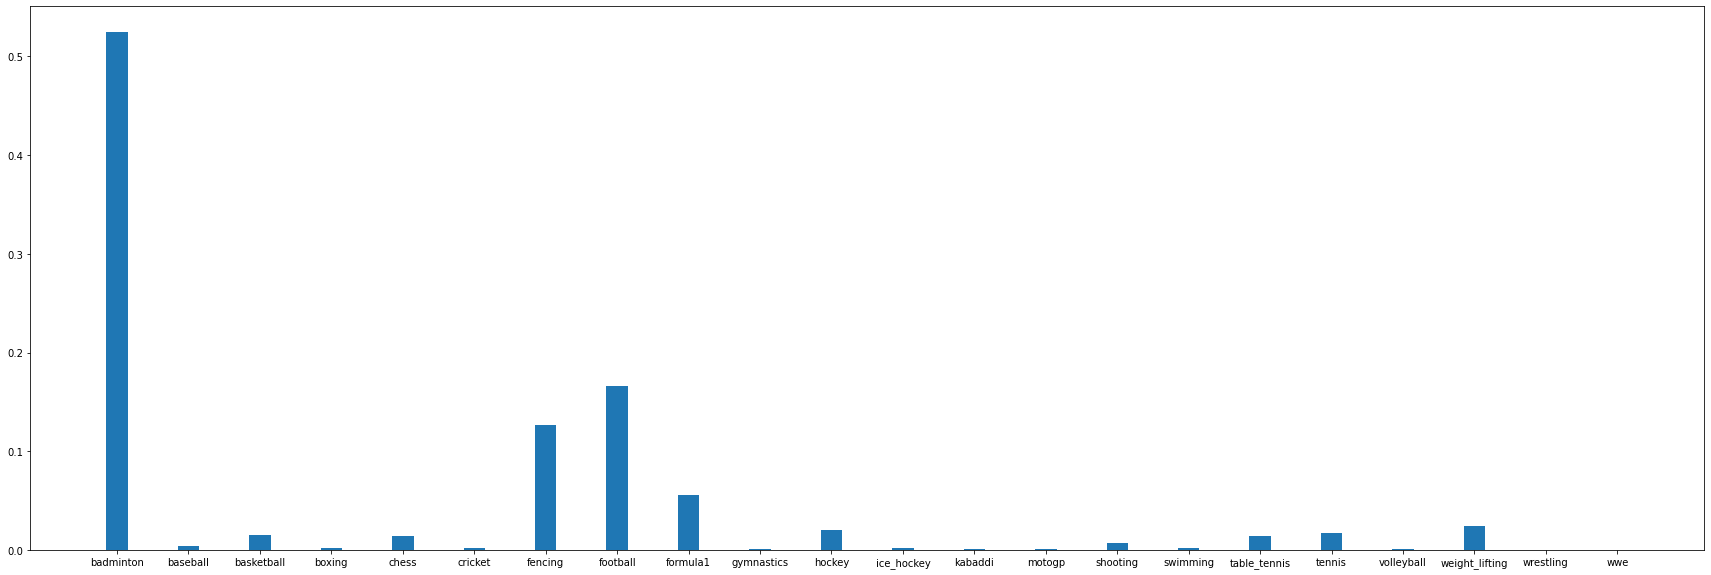

test/test/0.jpg


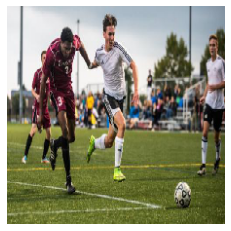

football


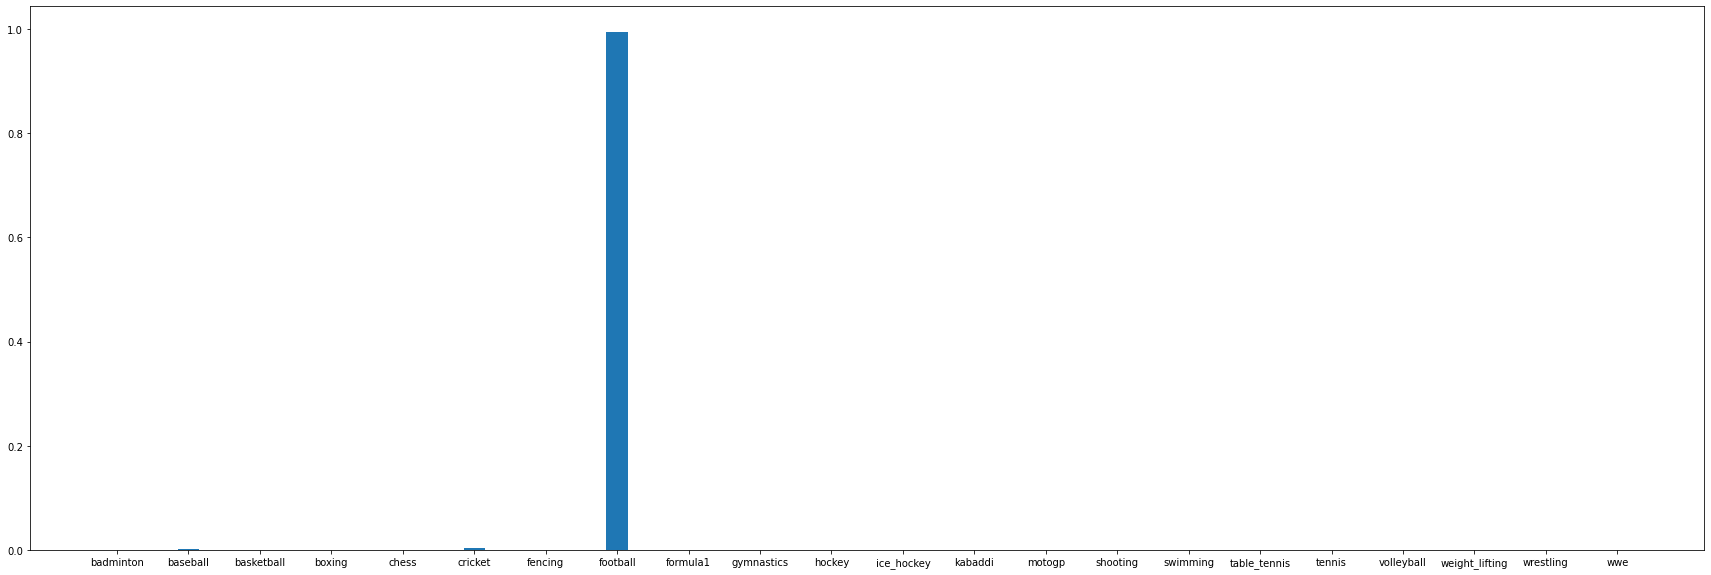

test/test/1.jpg


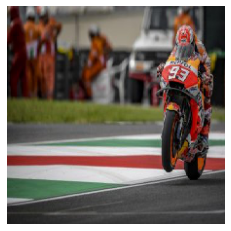

motogp


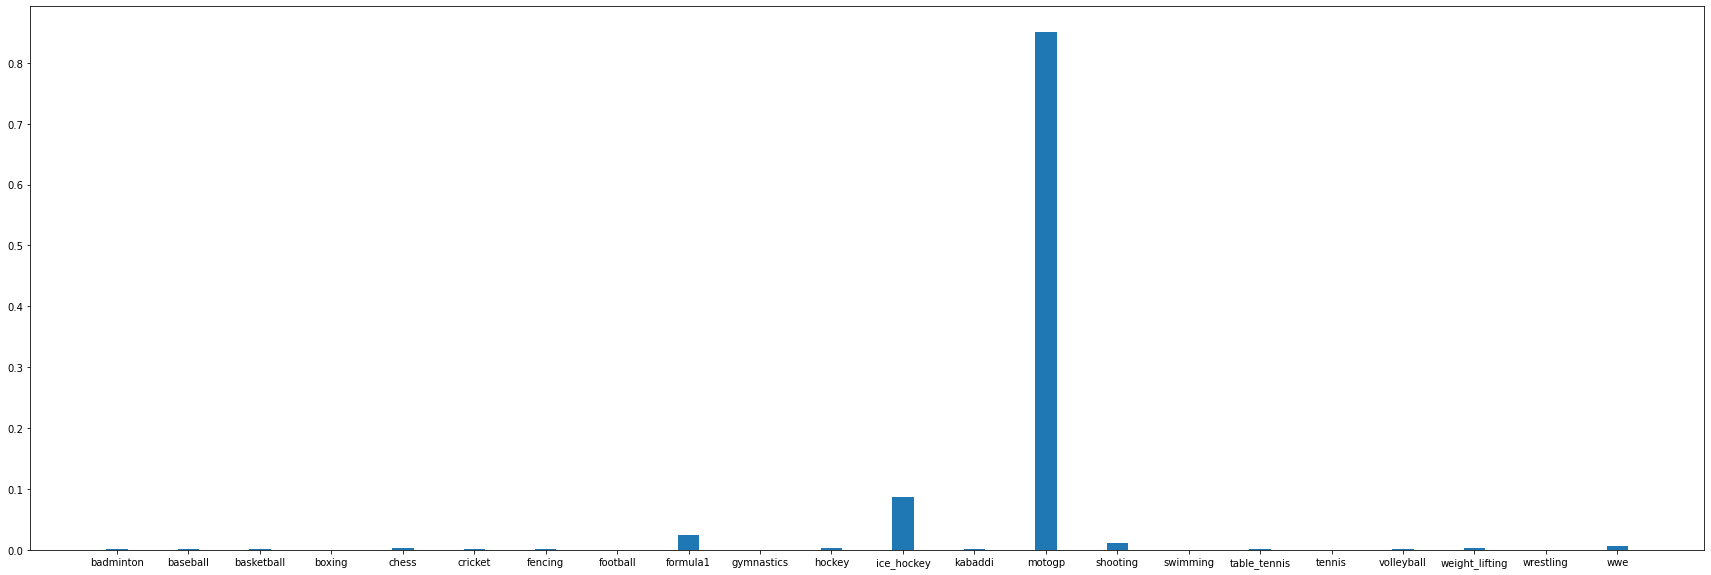

test/test/2.jpg


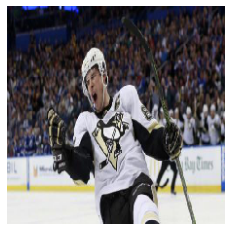

ice_hockey


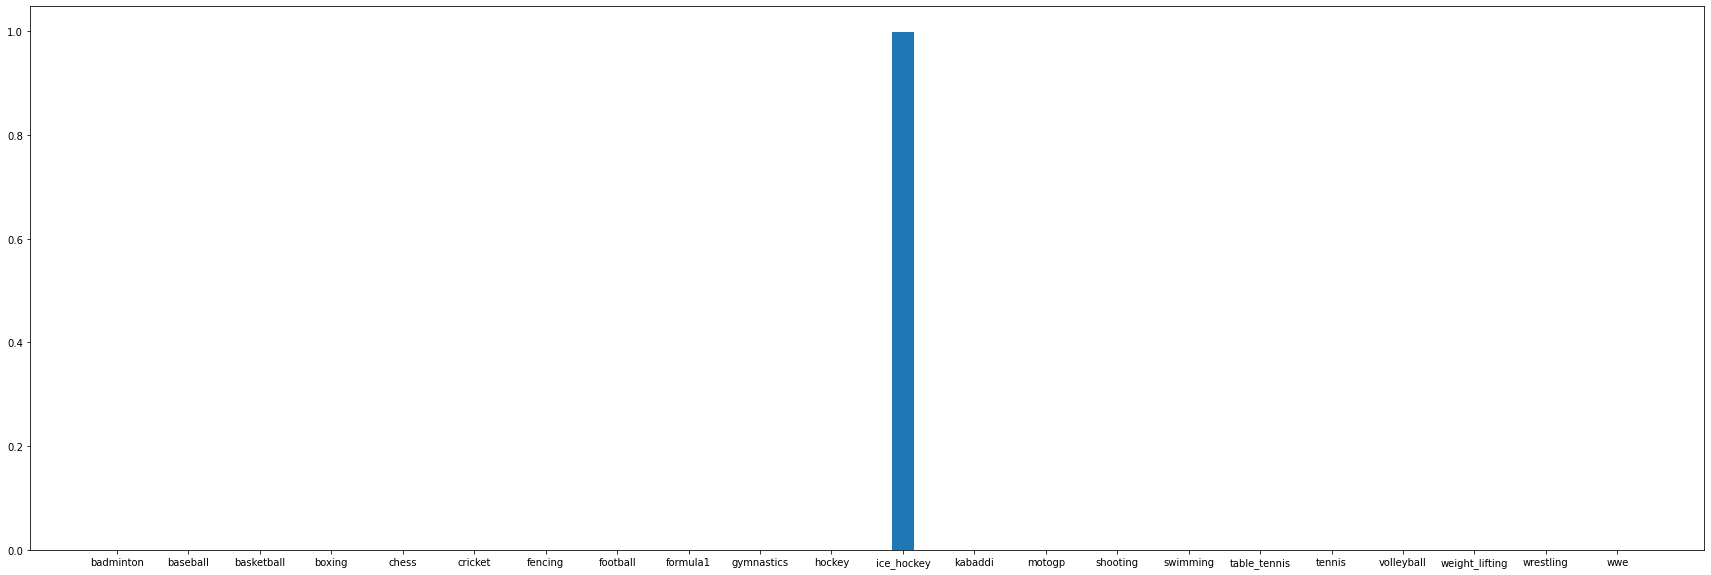

test/test/3.jpg


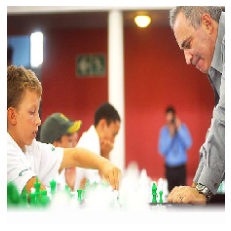

fencing


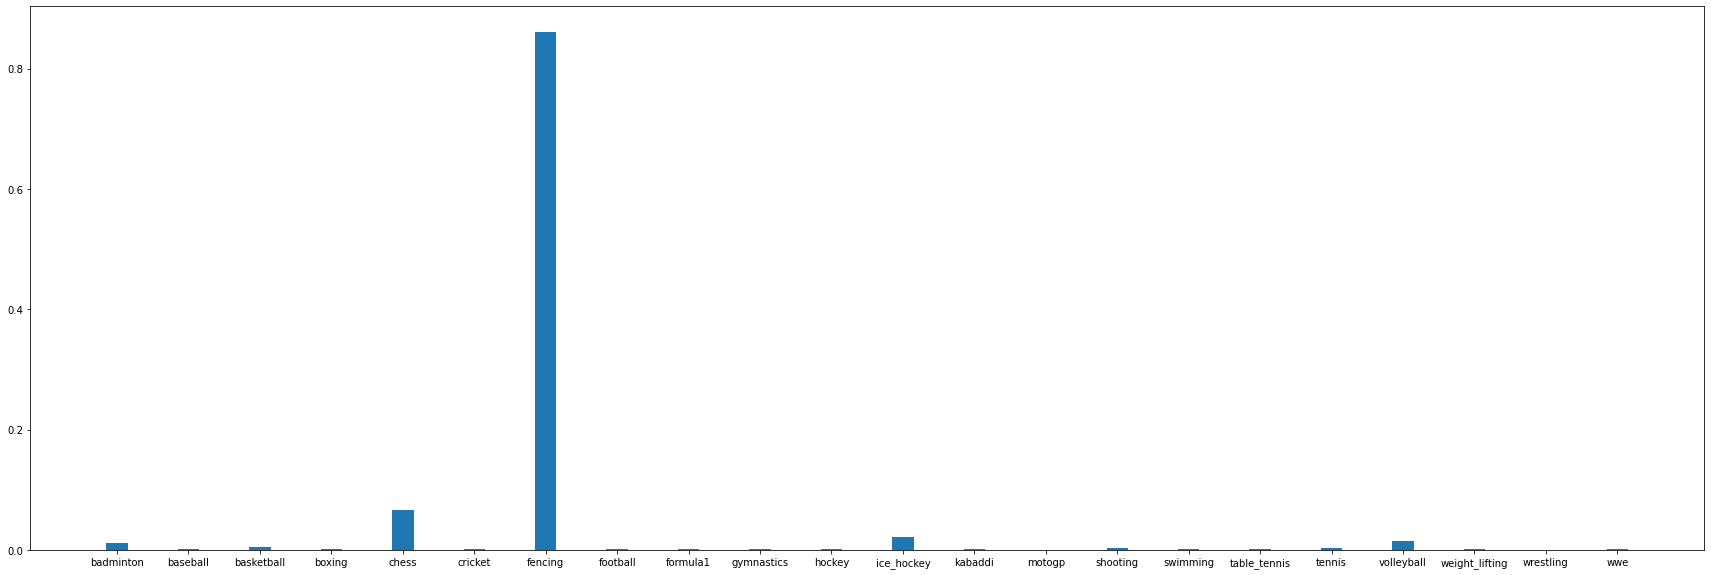

test/test/4.jpg


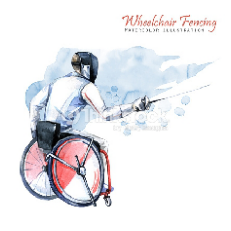

fencing


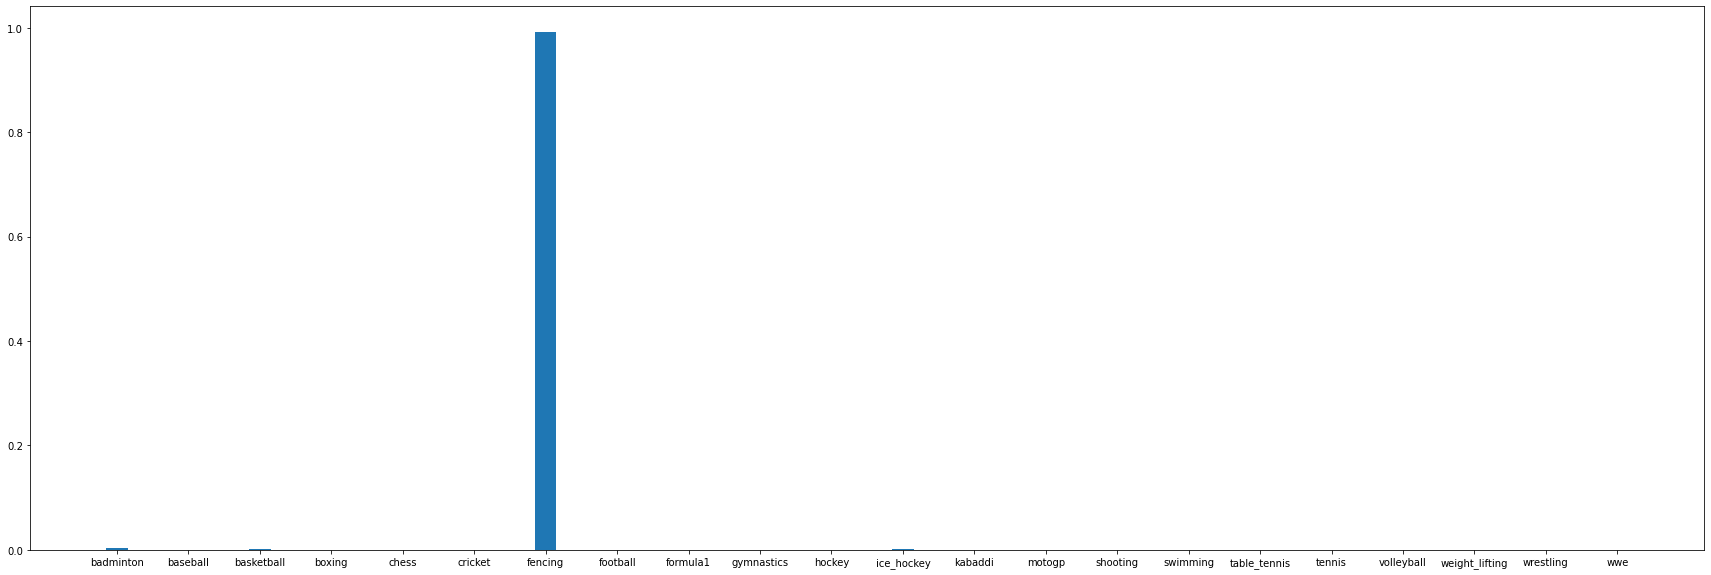

test/test/5.jpg


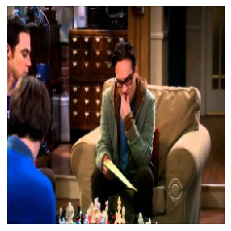

chess


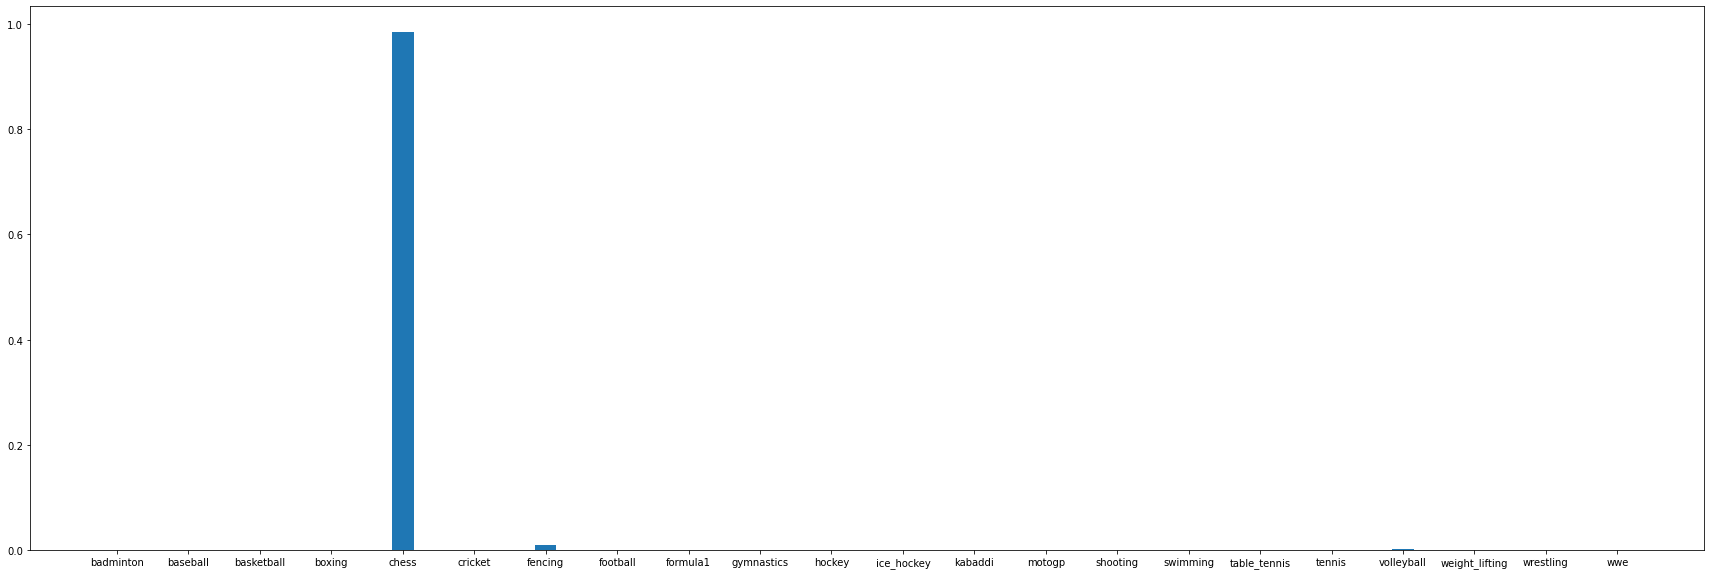

test/test/6.jpg


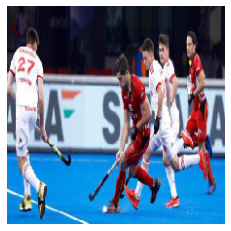

hockey


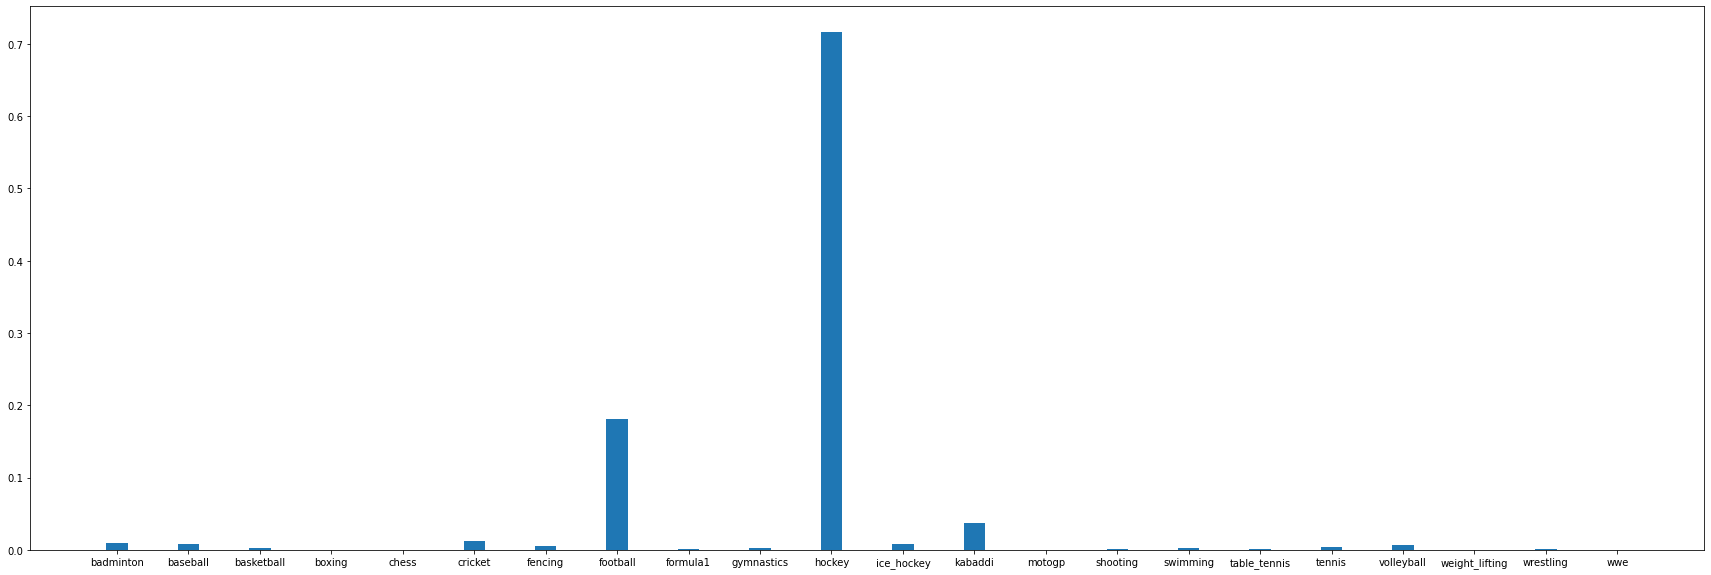

test/test/7.jpg


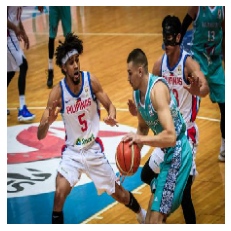

basketball


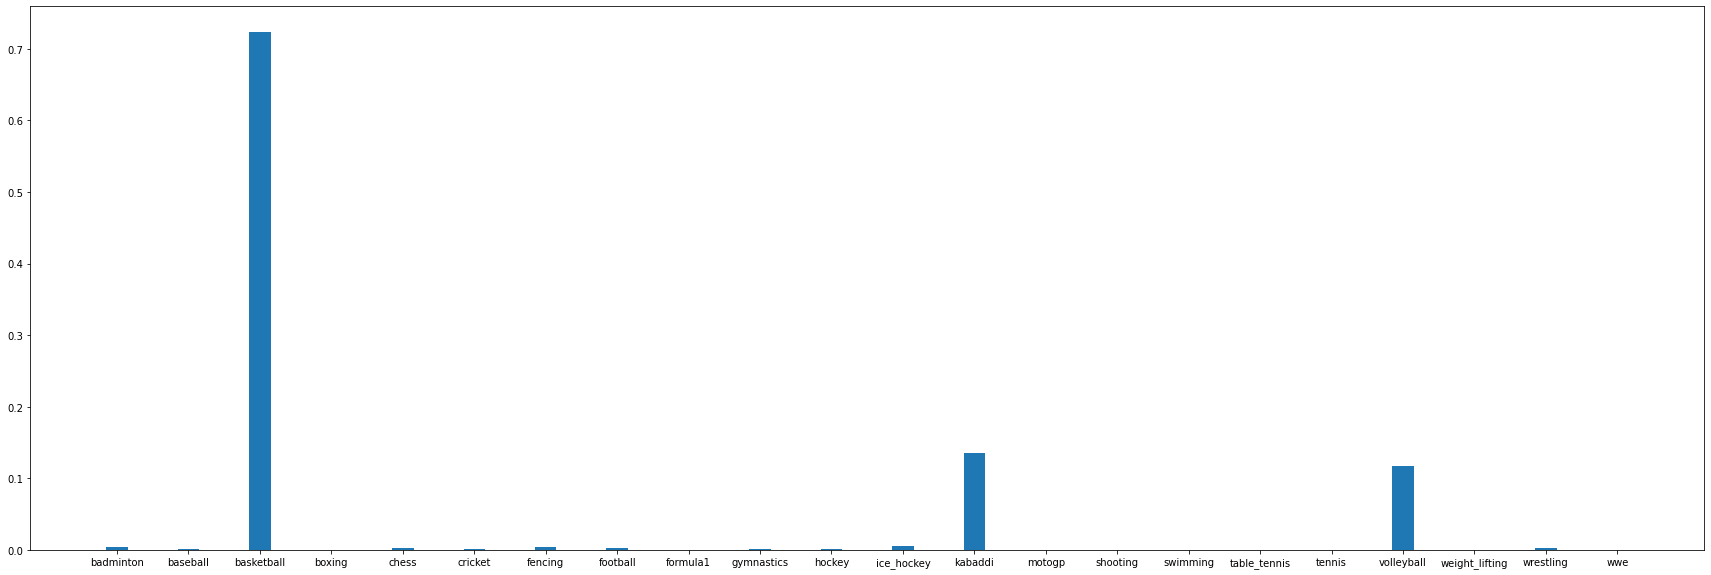

test/test/8.jpg


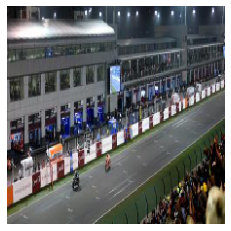

swimming


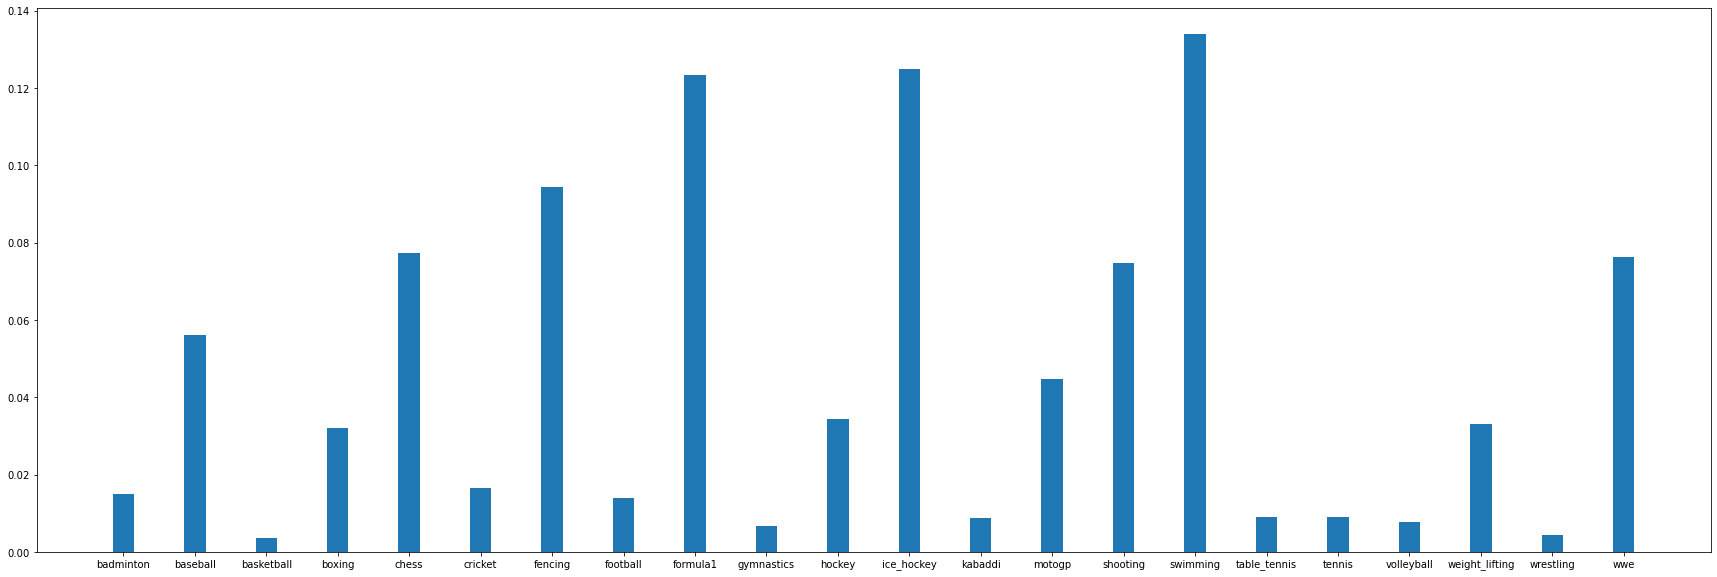

test/test/9.jpg


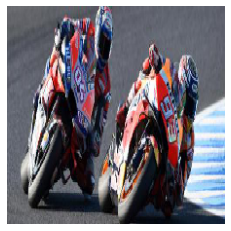

ice_hockey


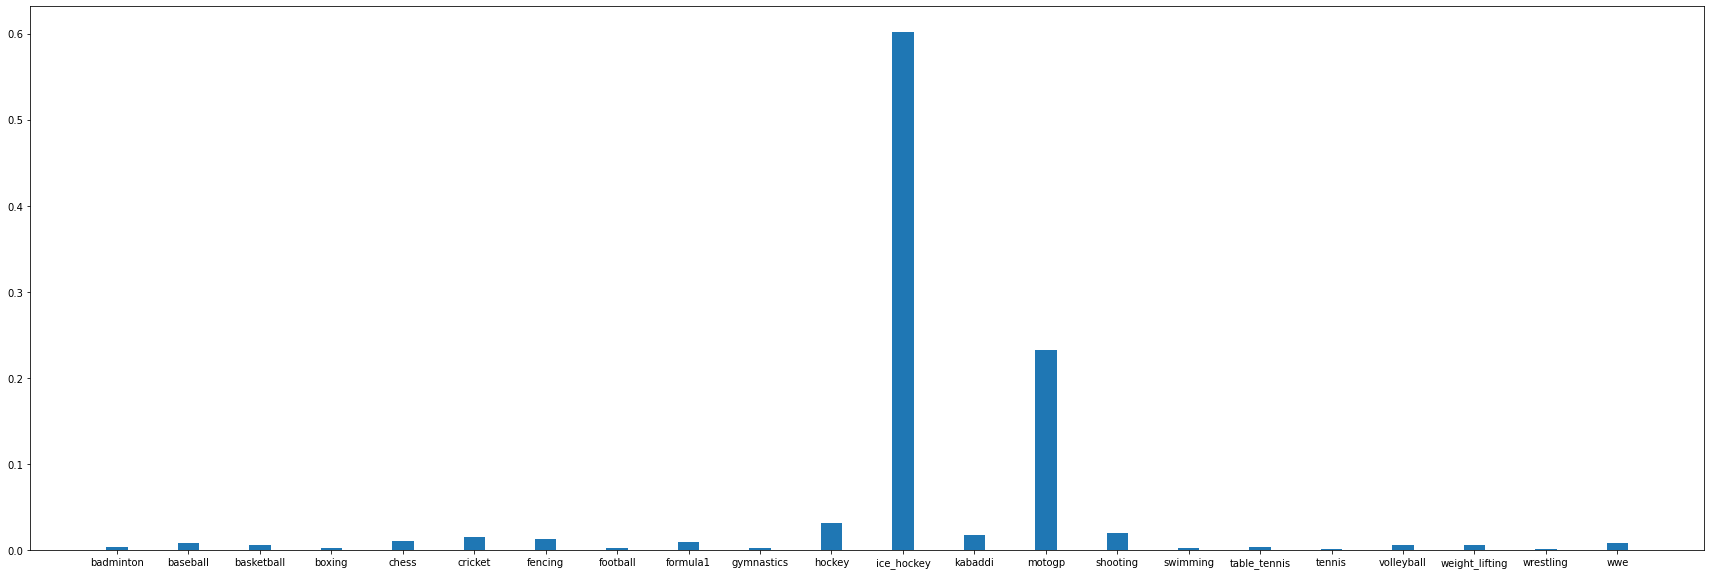

test/test/10.jpg


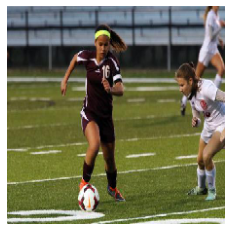

football


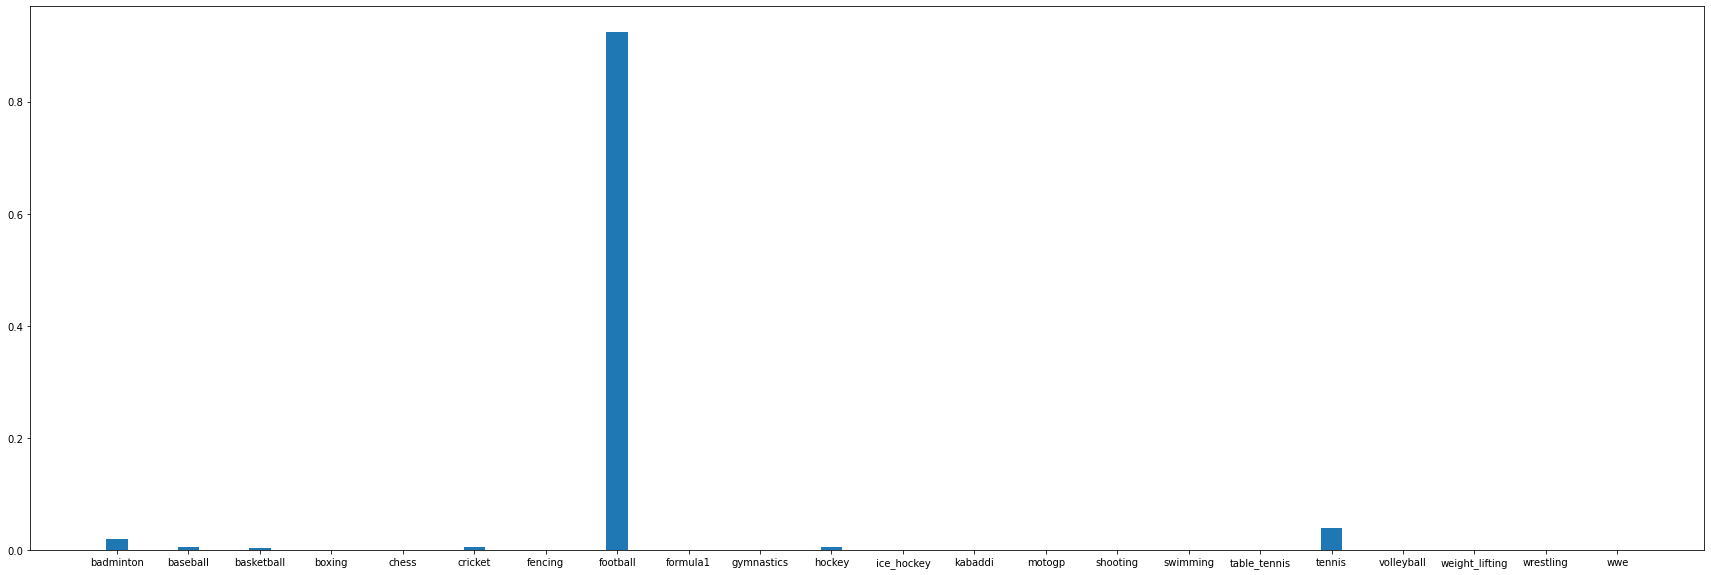

test/test/11.jpg


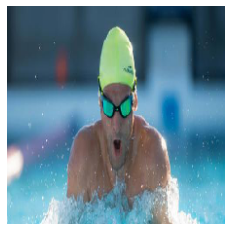

fencing


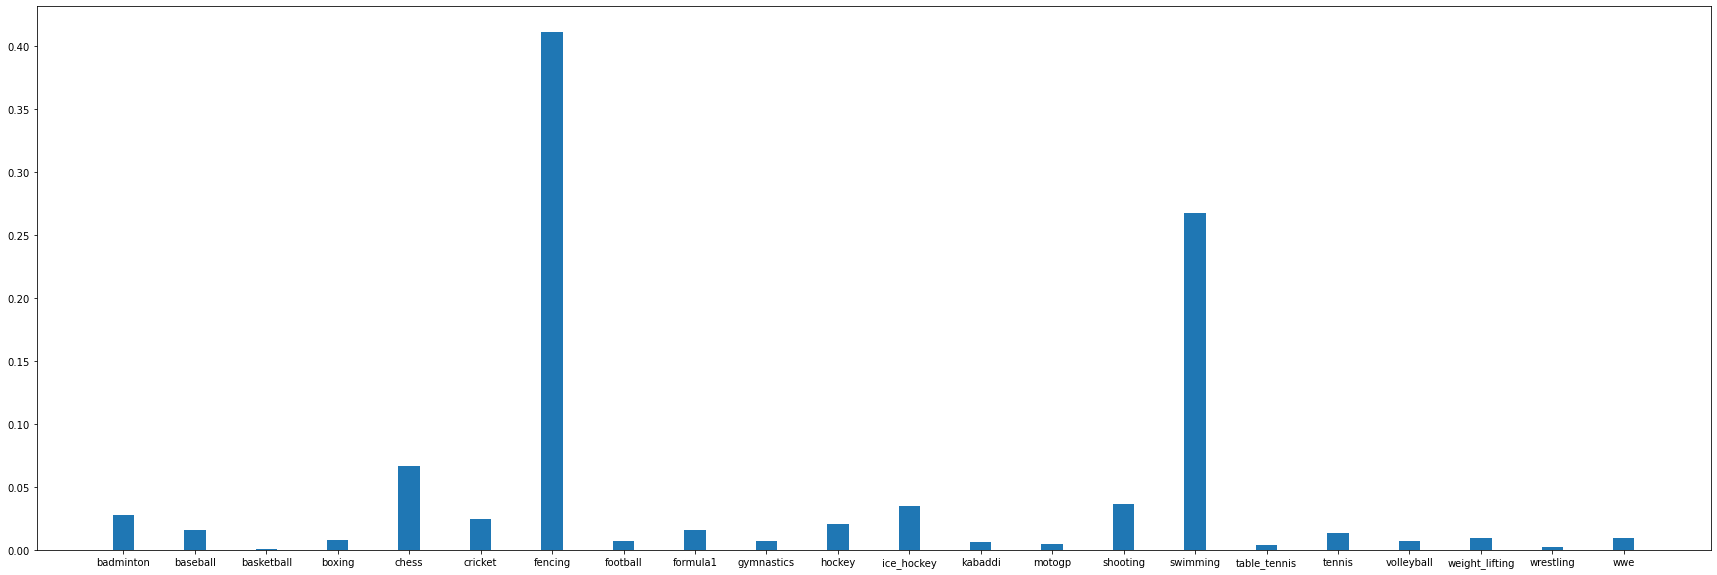

test/test/12.jpg


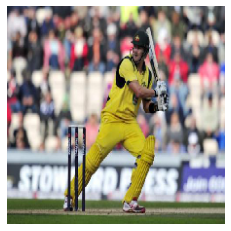

cricket


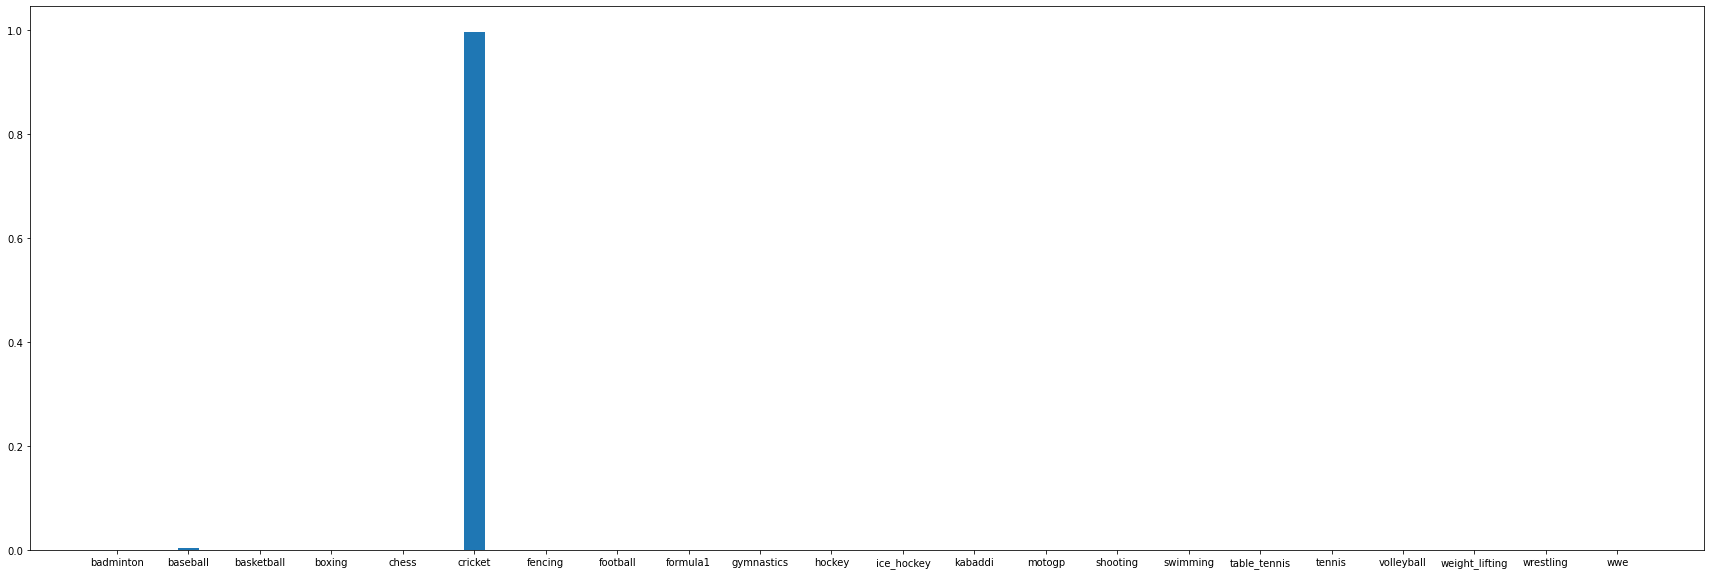

test/test/13.jpg


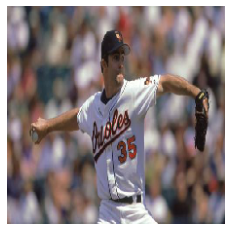

baseball


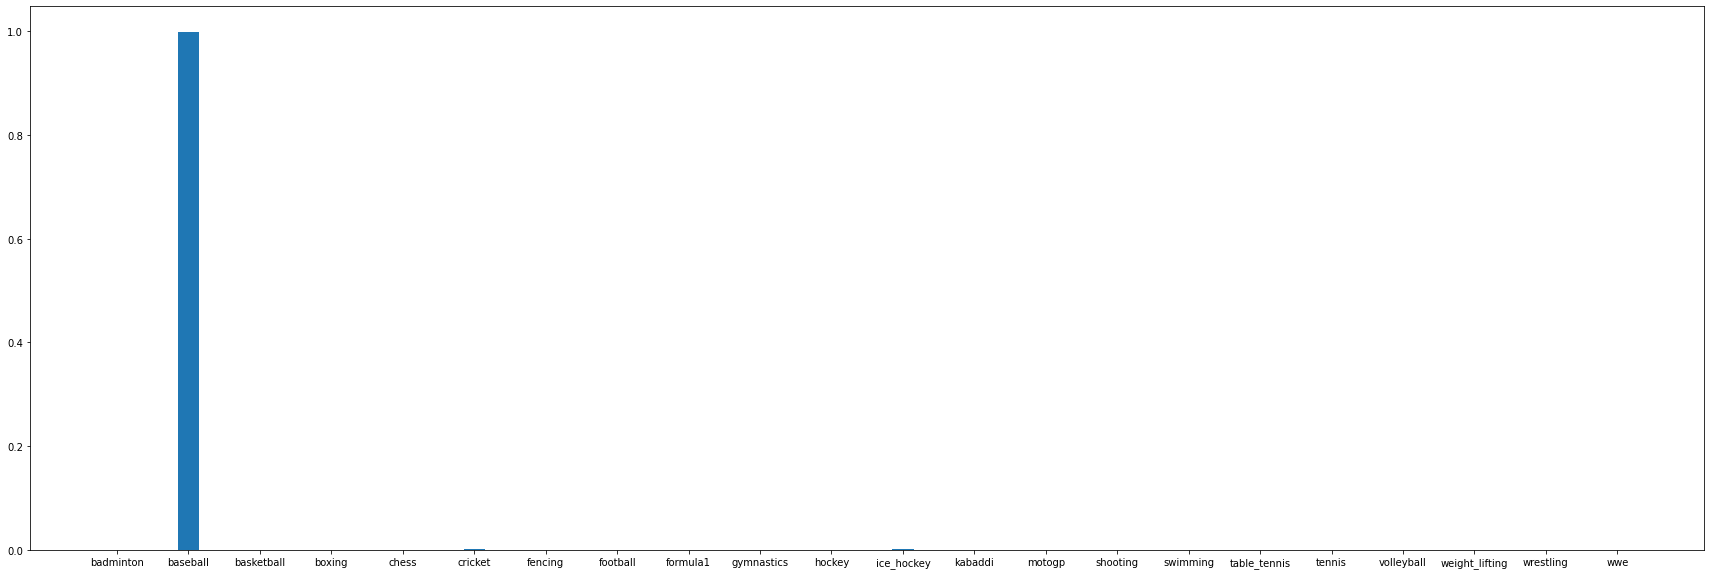

test/test/14.jpg


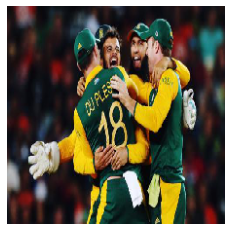

baseball


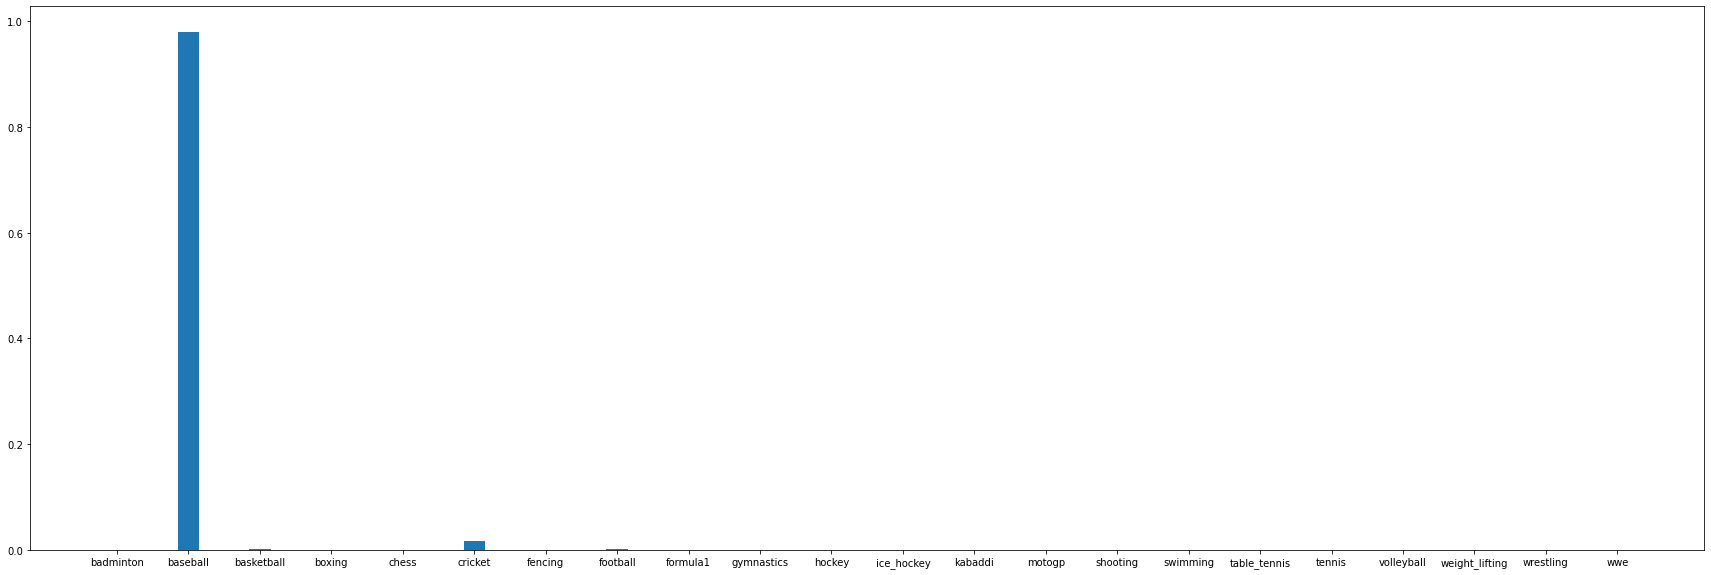

test/test/15.jpg


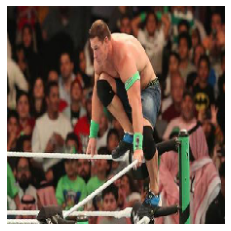

wwe


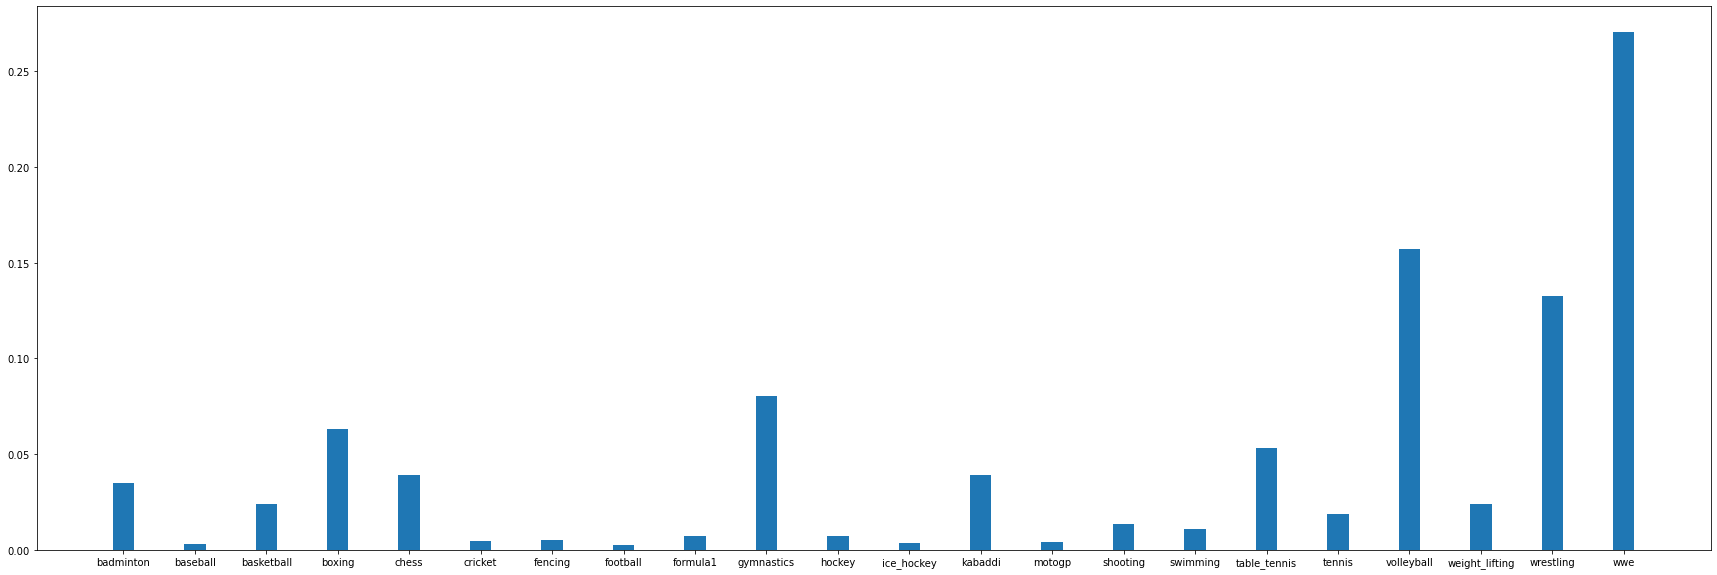

test/test/16.jpg


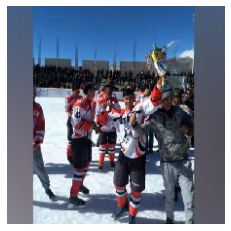

ice_hockey


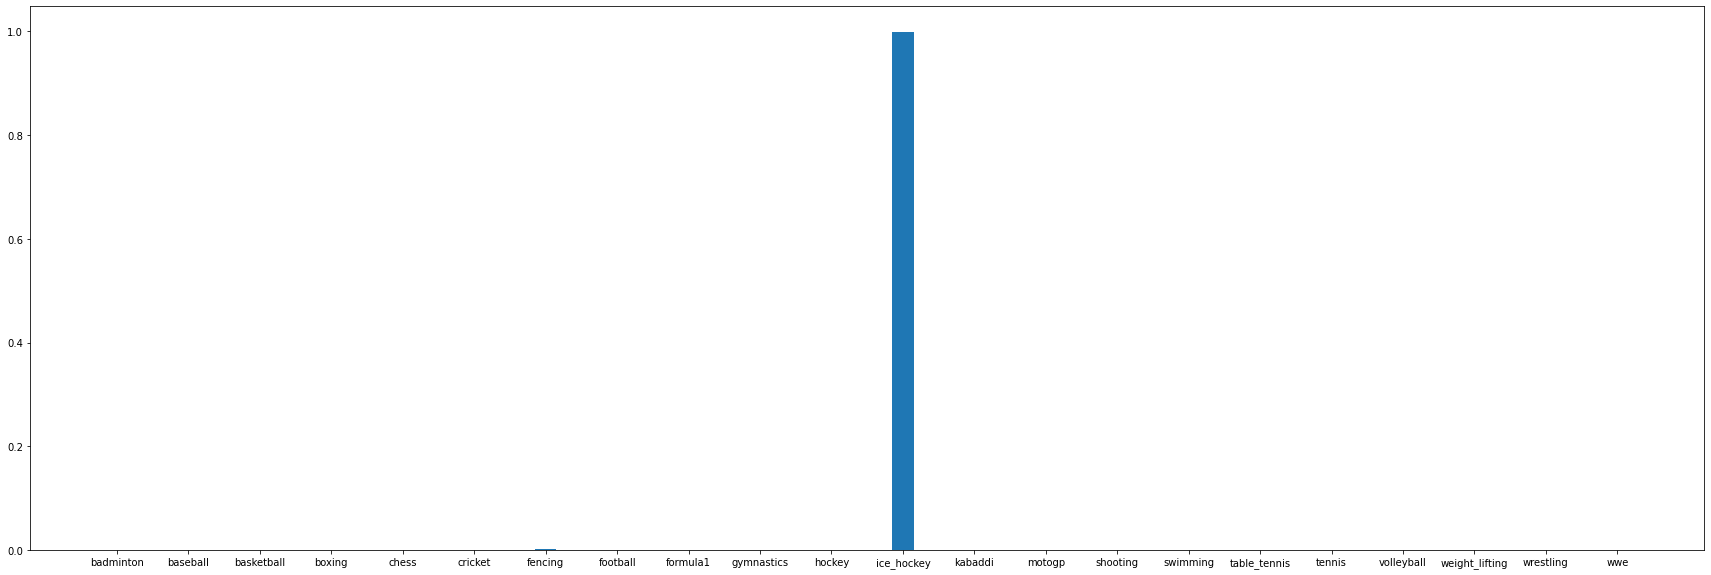

test/test/17.jpg


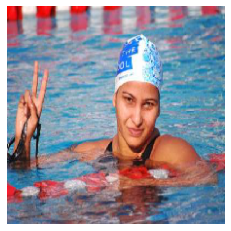

swimming


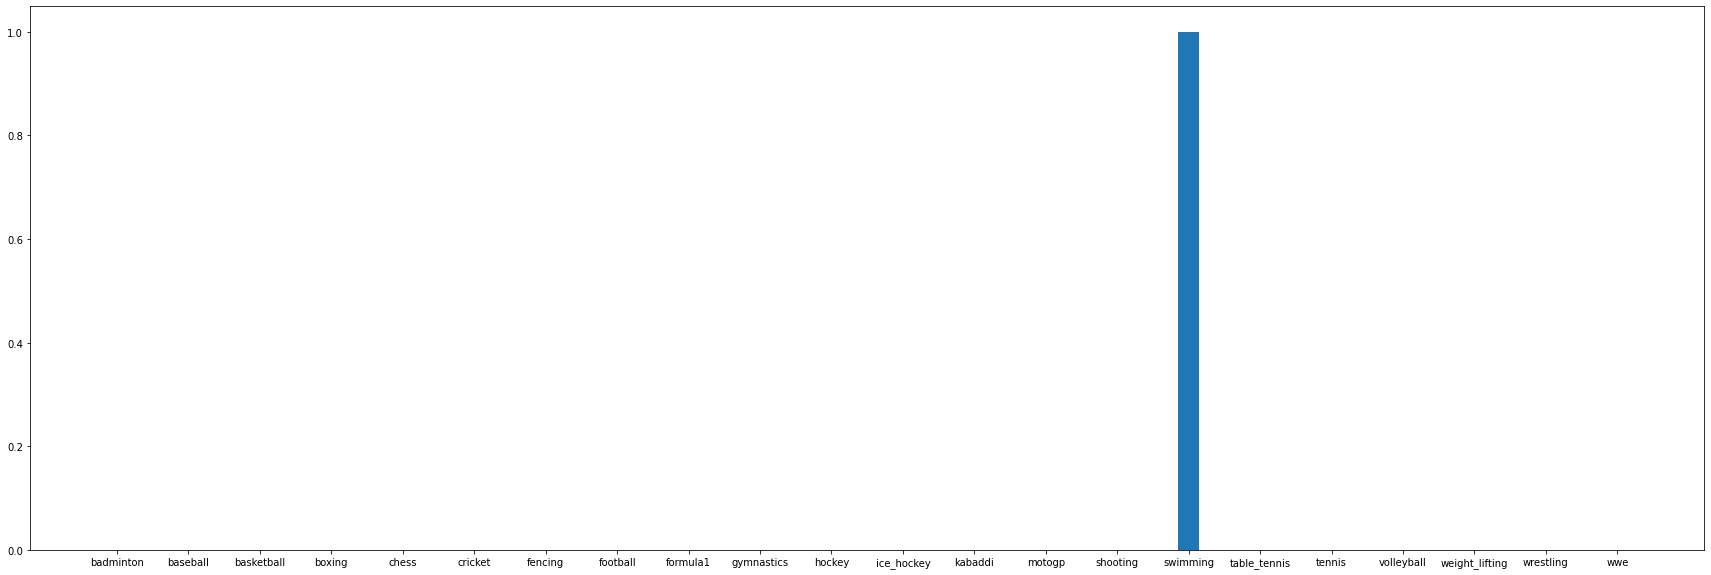

test/test/18.jpg


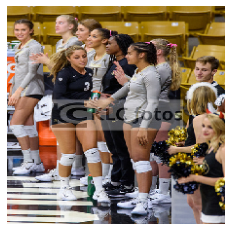

chess


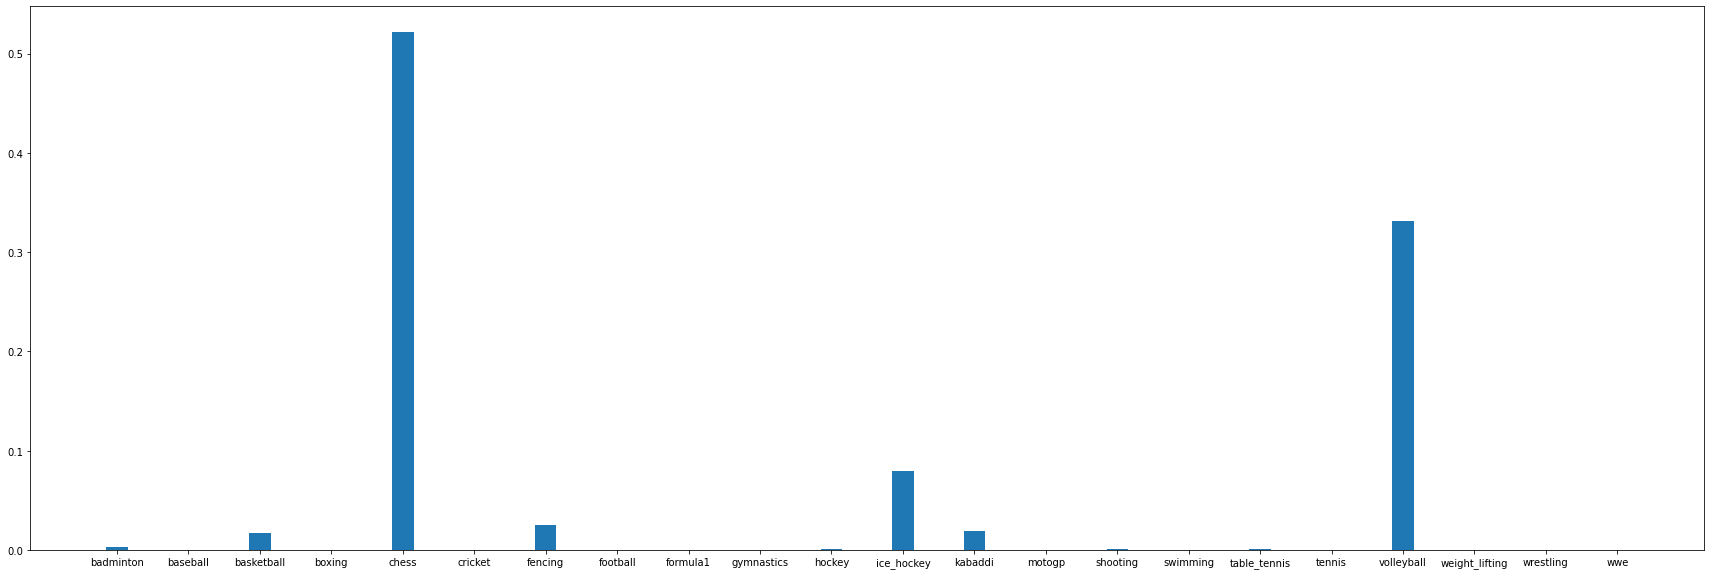

test/test/19.jpg


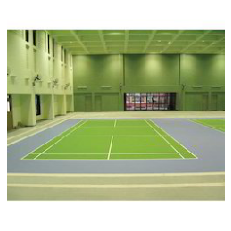

tennis


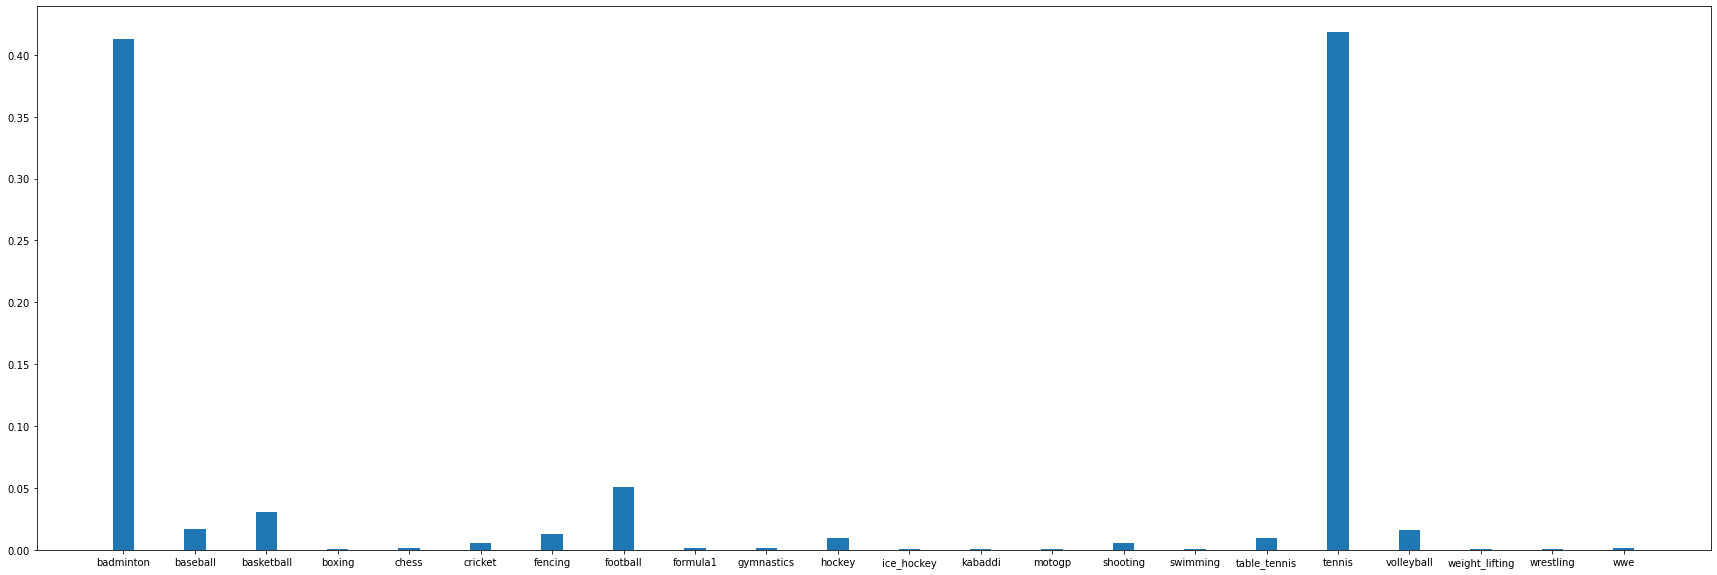

test/test/124.jpg


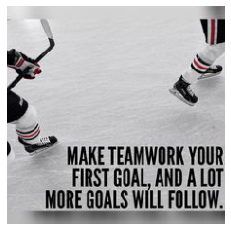

fencing


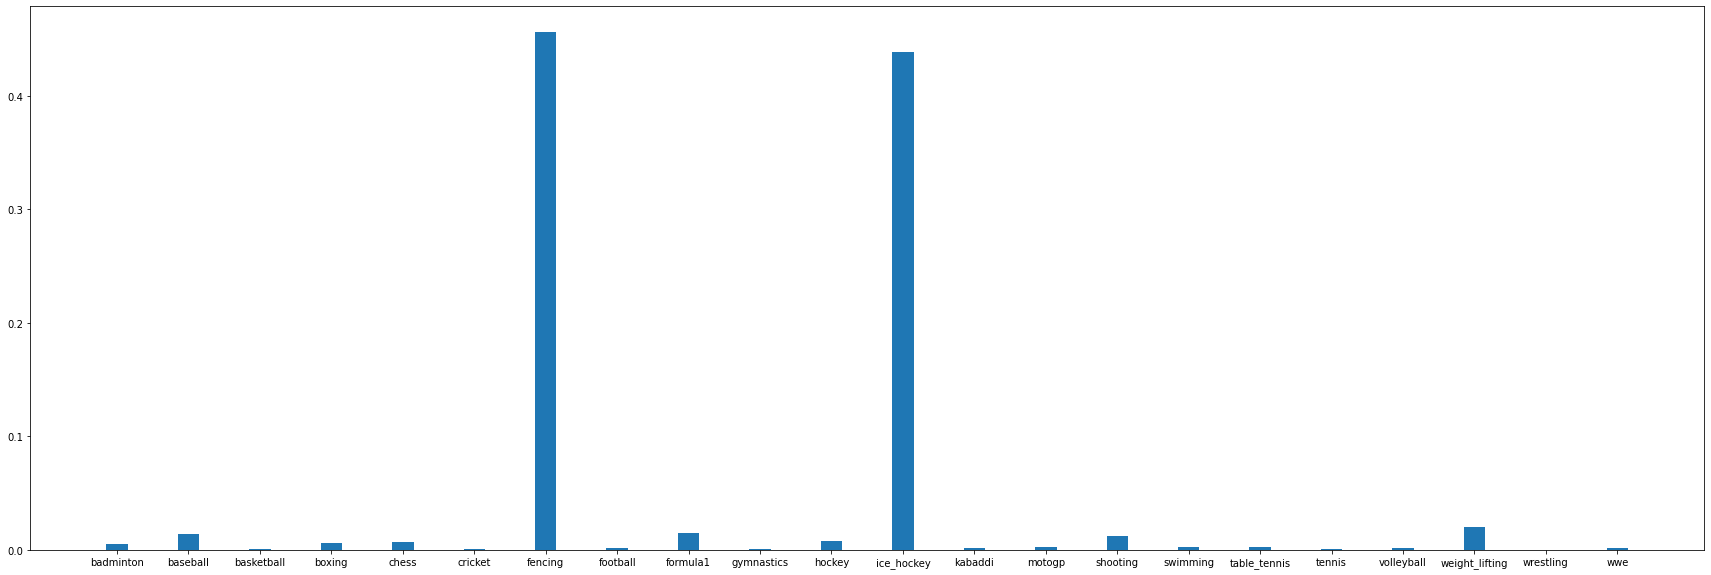

test/test/151.jpg


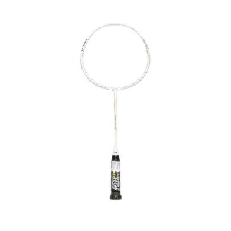

badminton


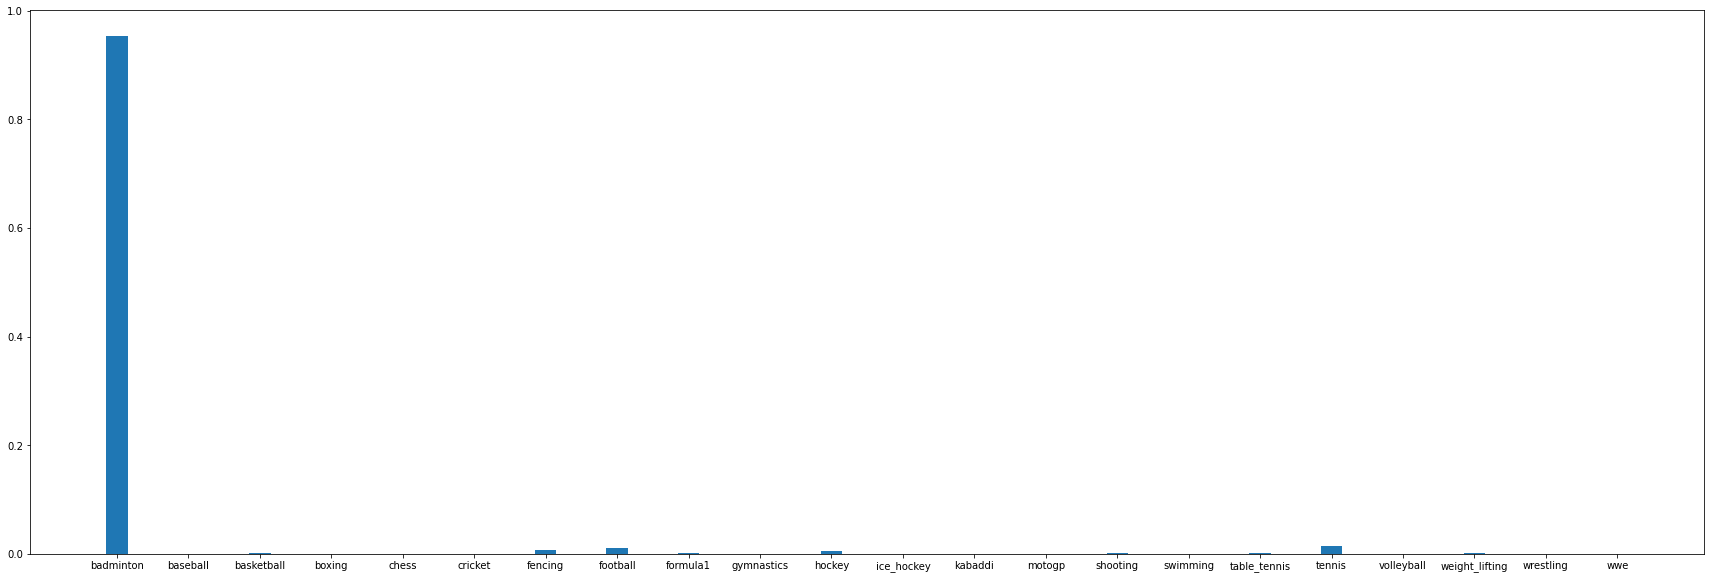

test/test/202.jpg


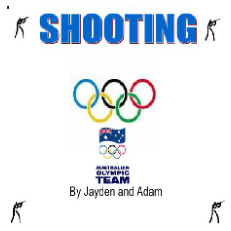

fencing


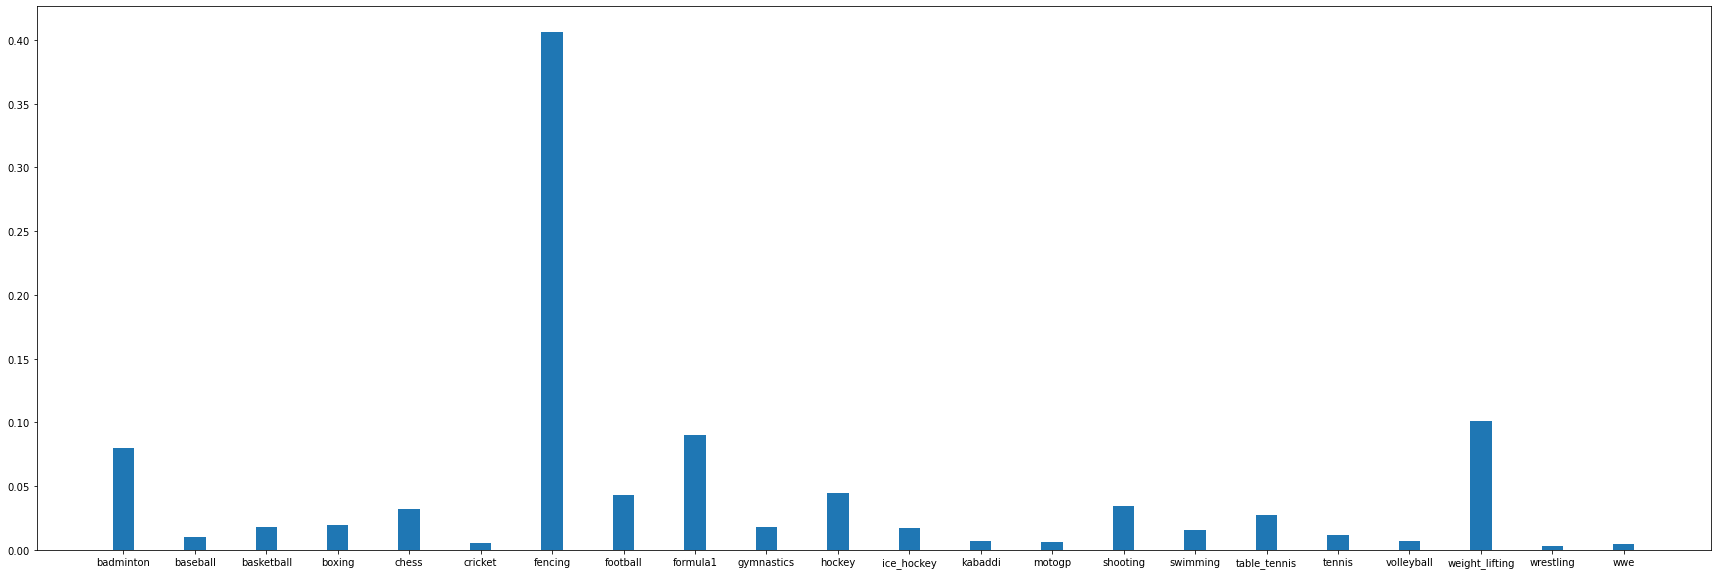

test/test/270.jpg


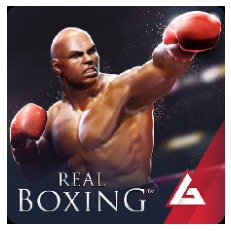

boxing


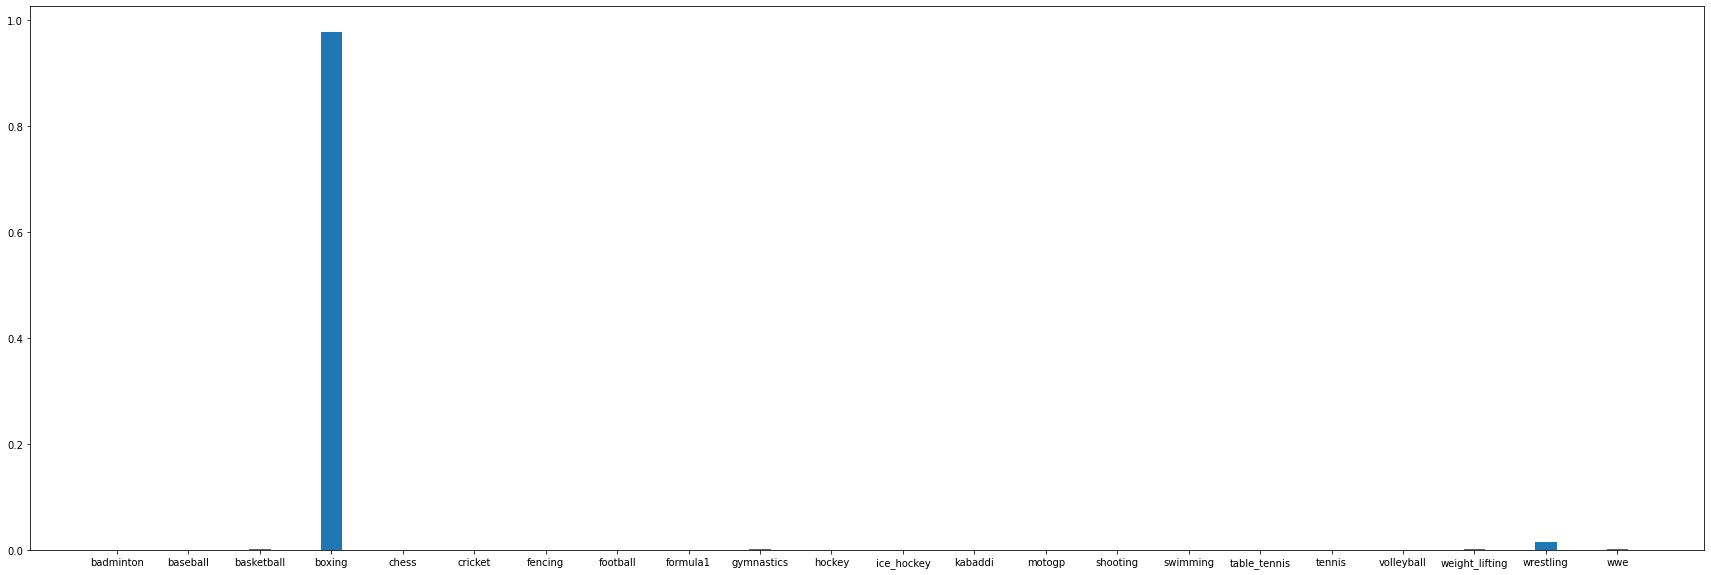

test/test/285.jpg


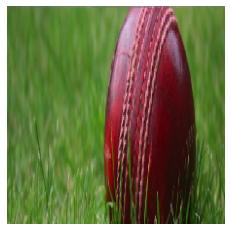

badminton


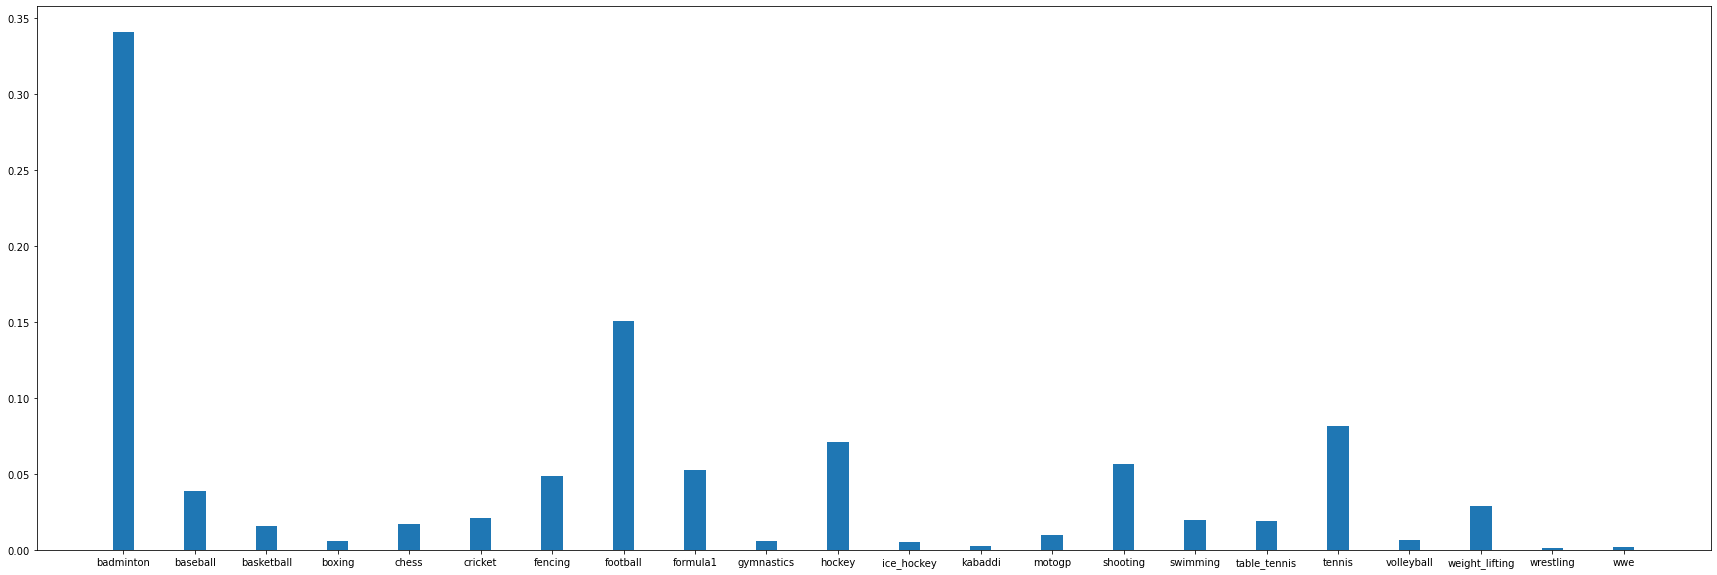

test/test/317.jpg


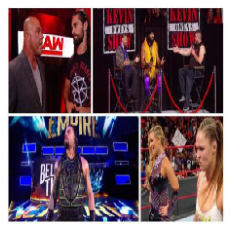

volleyball


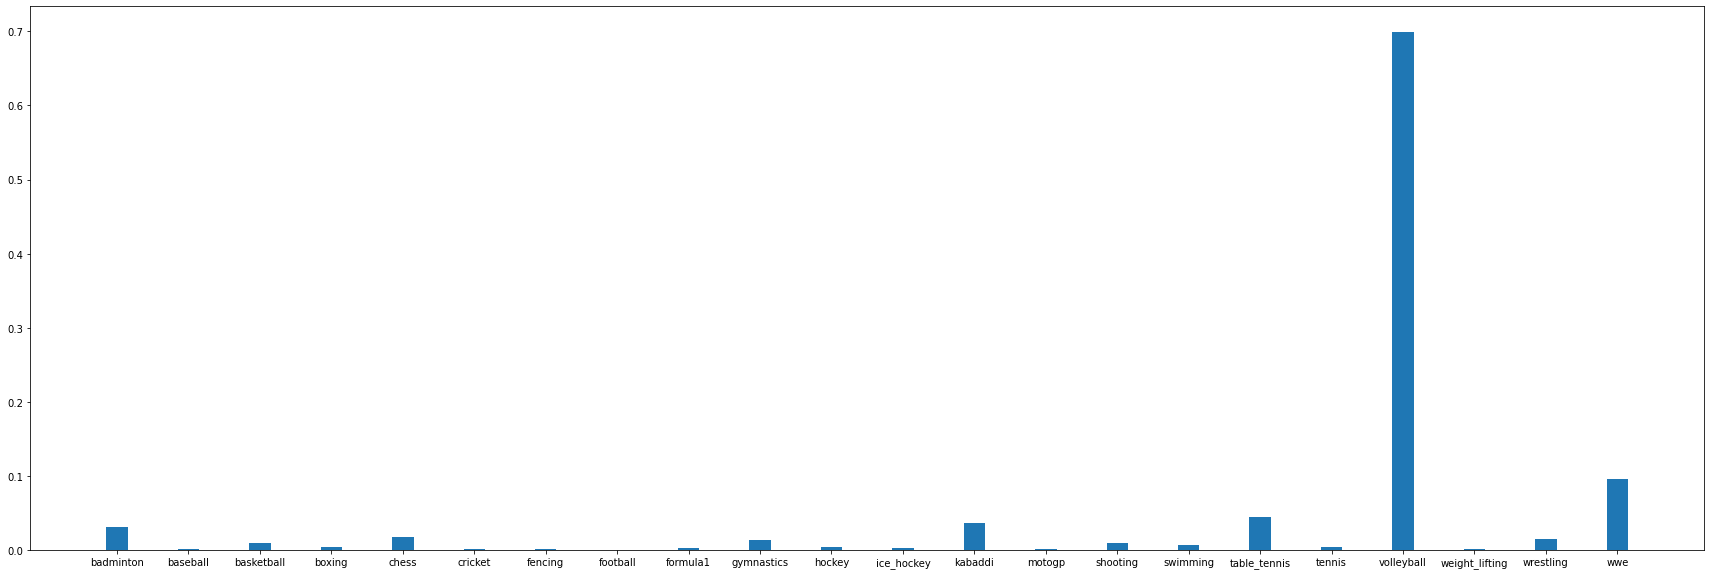

test/test/394.jpg


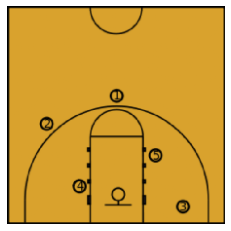

basketball


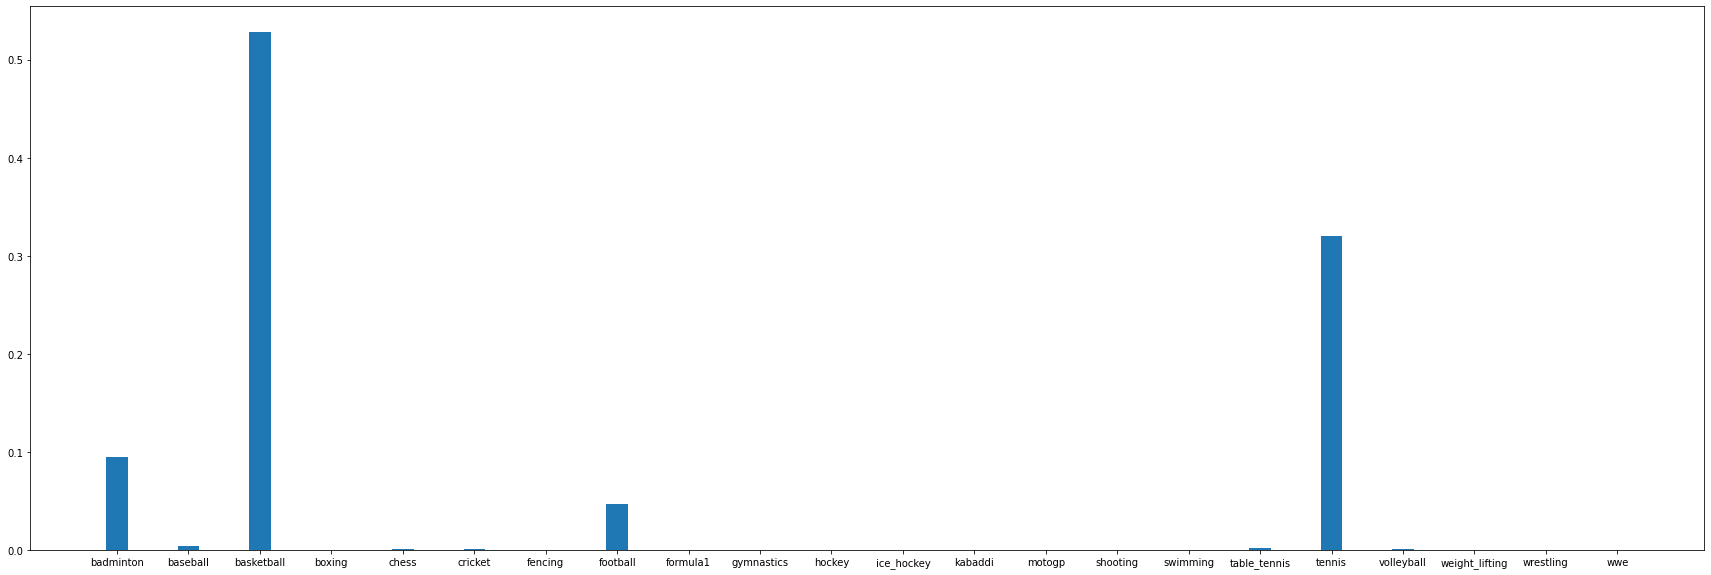

test/test/416.jpg


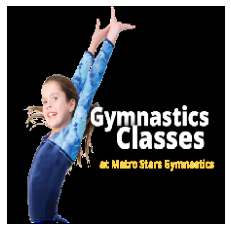

gymnastics


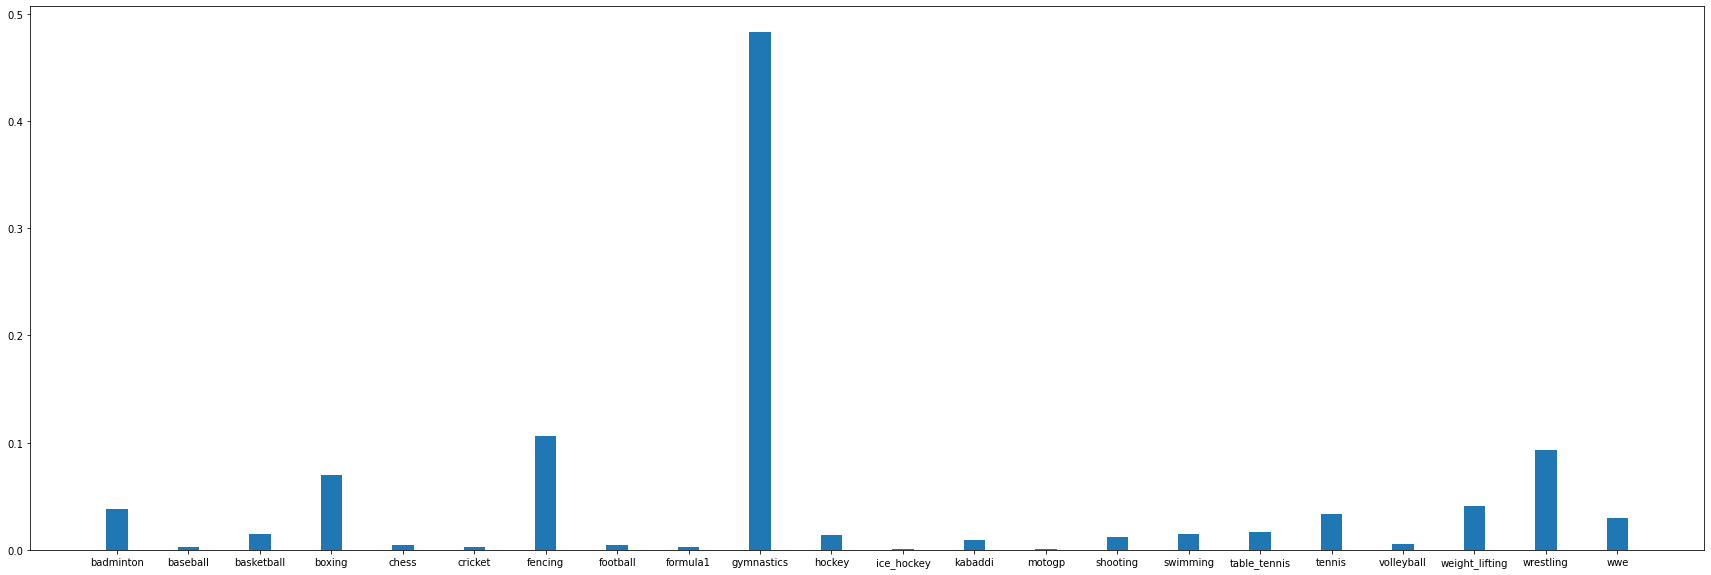

test/test/458.jpg


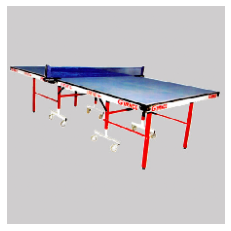

table_tennis


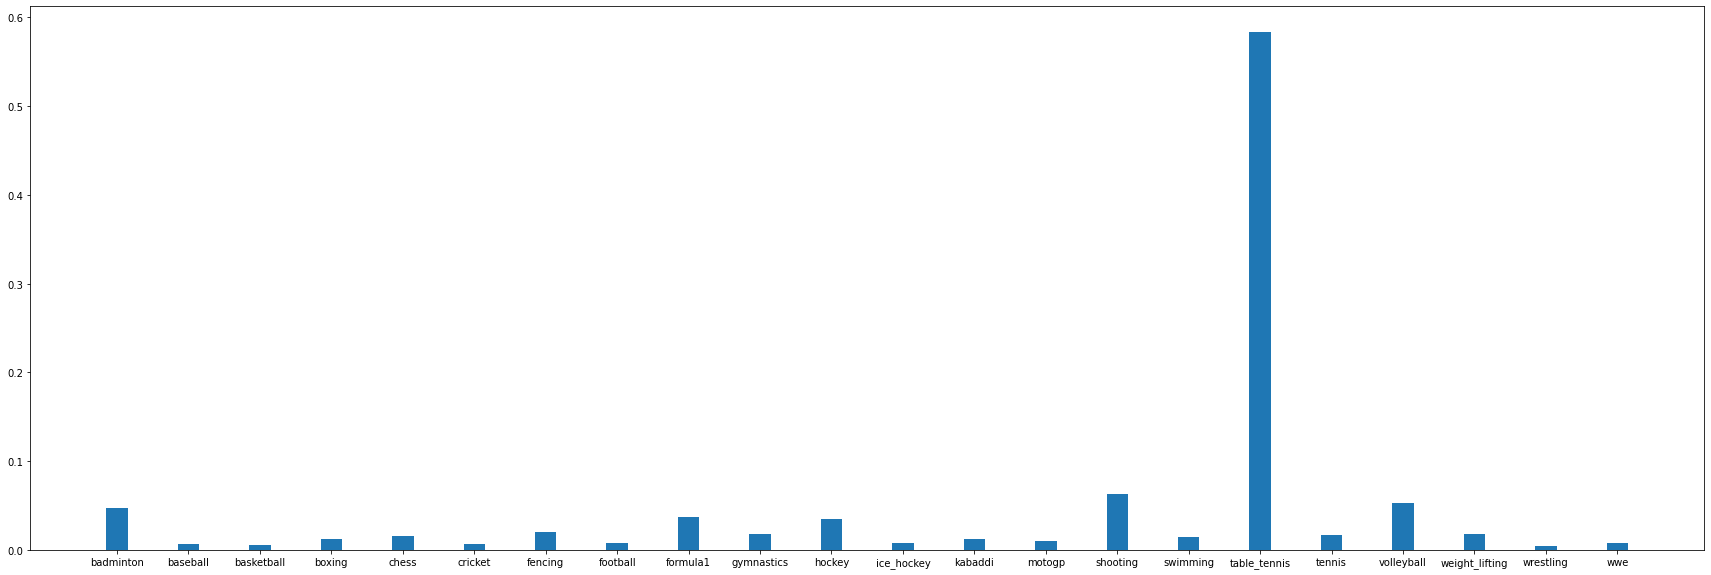

test/test/485.jpg


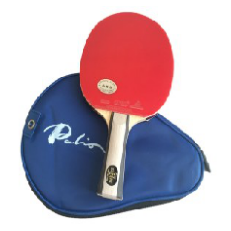

tennis


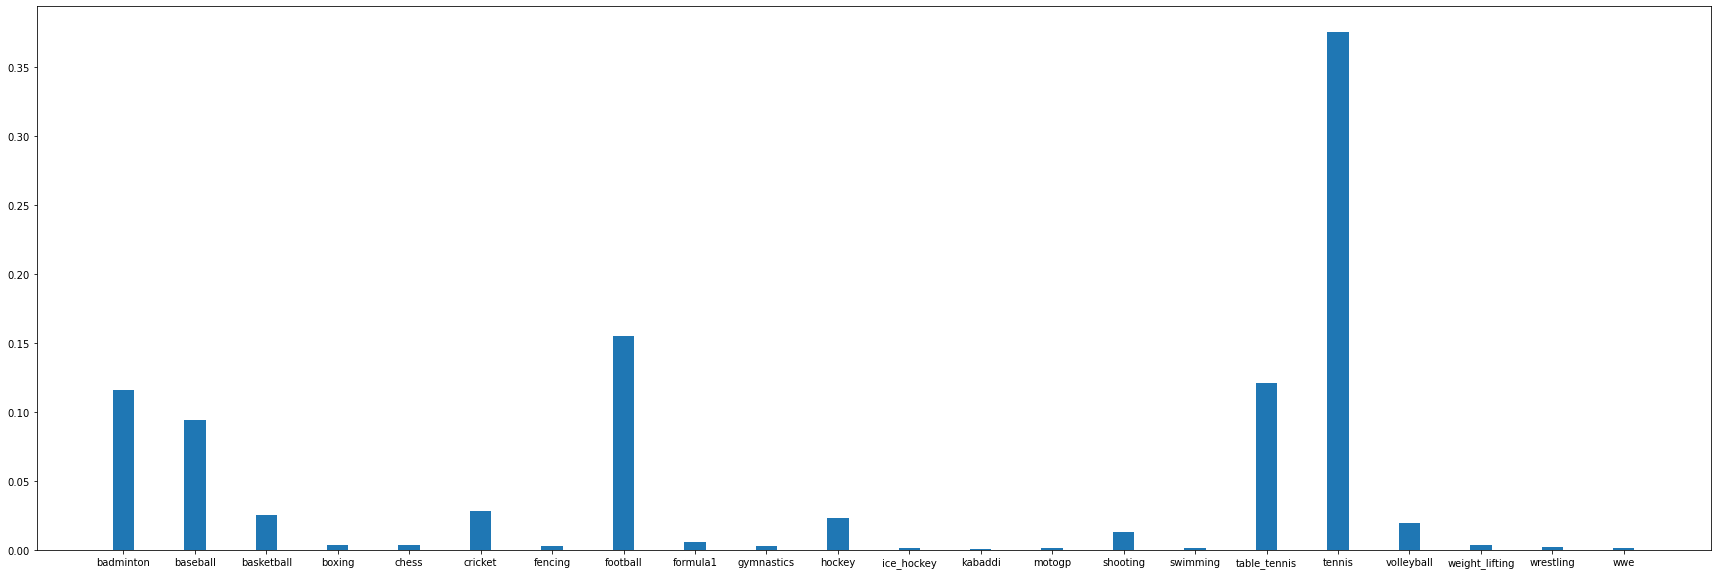

test/test/560.jpg


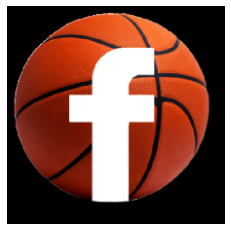

basketball


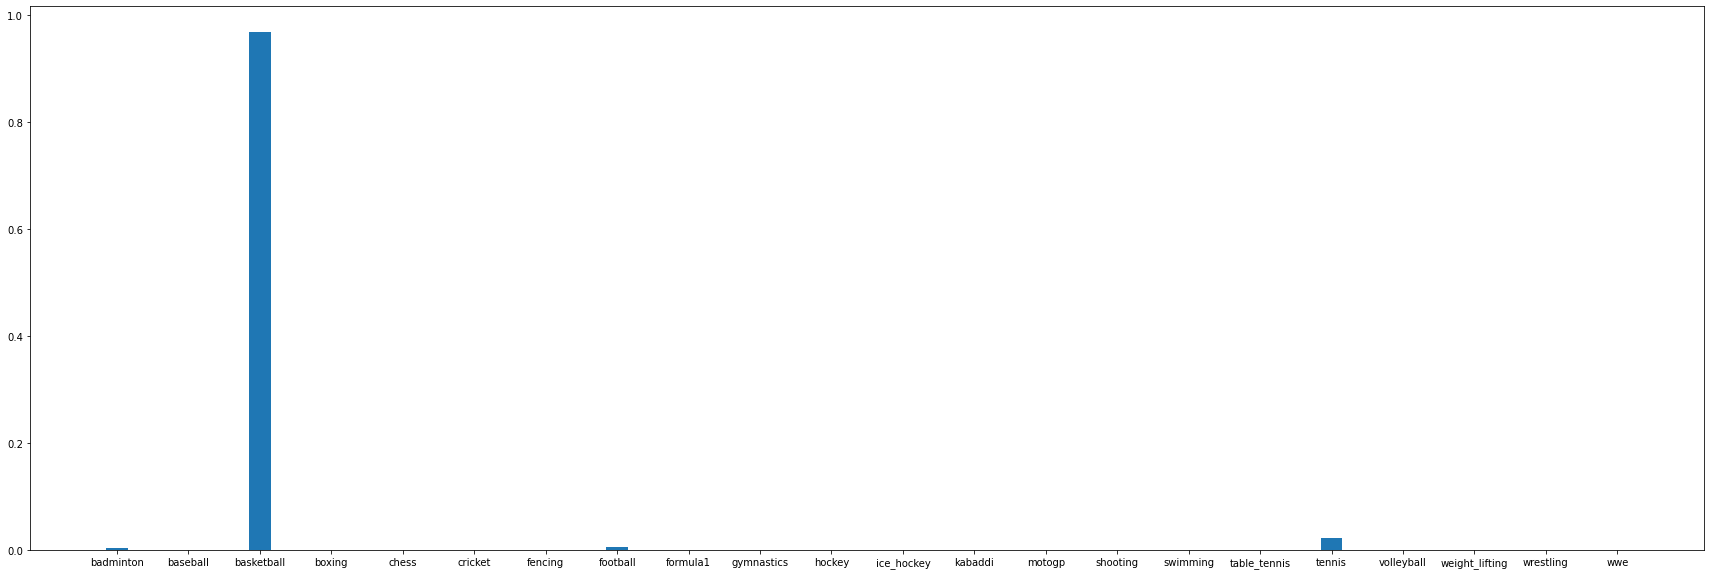

test/test/557.jpg


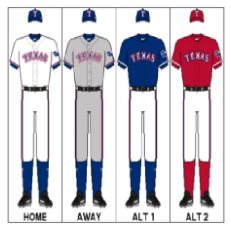

fencing


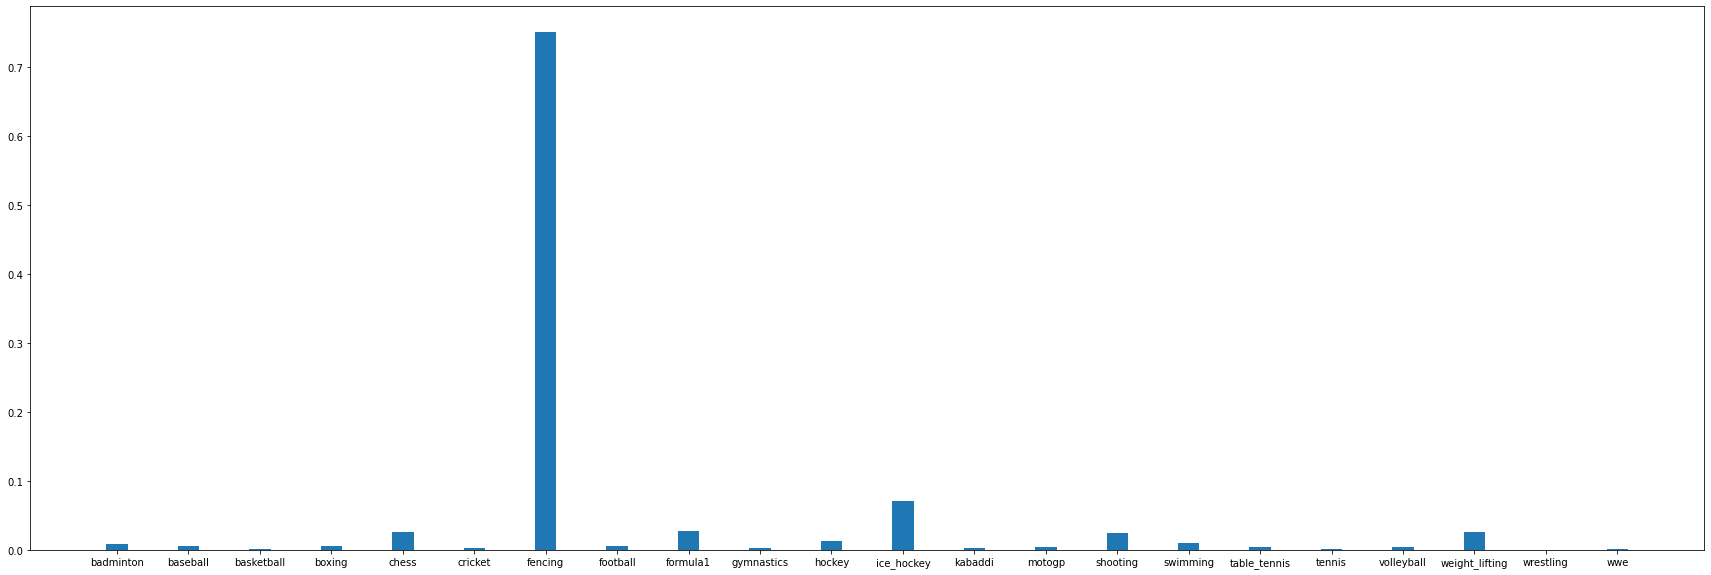

test/test/856.jpg


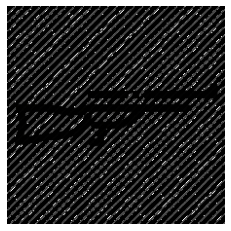

fencing


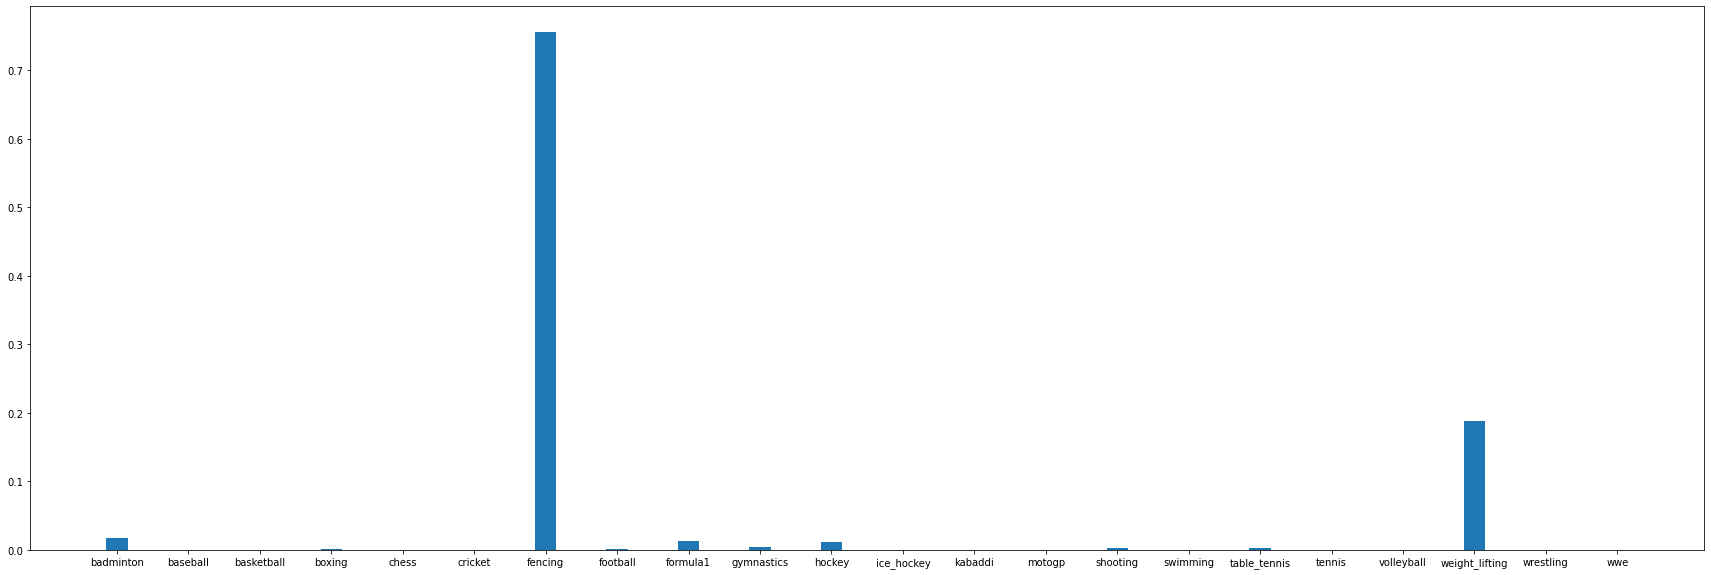

test/test/1034.jpg


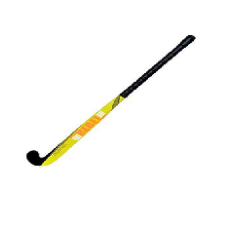

fencing


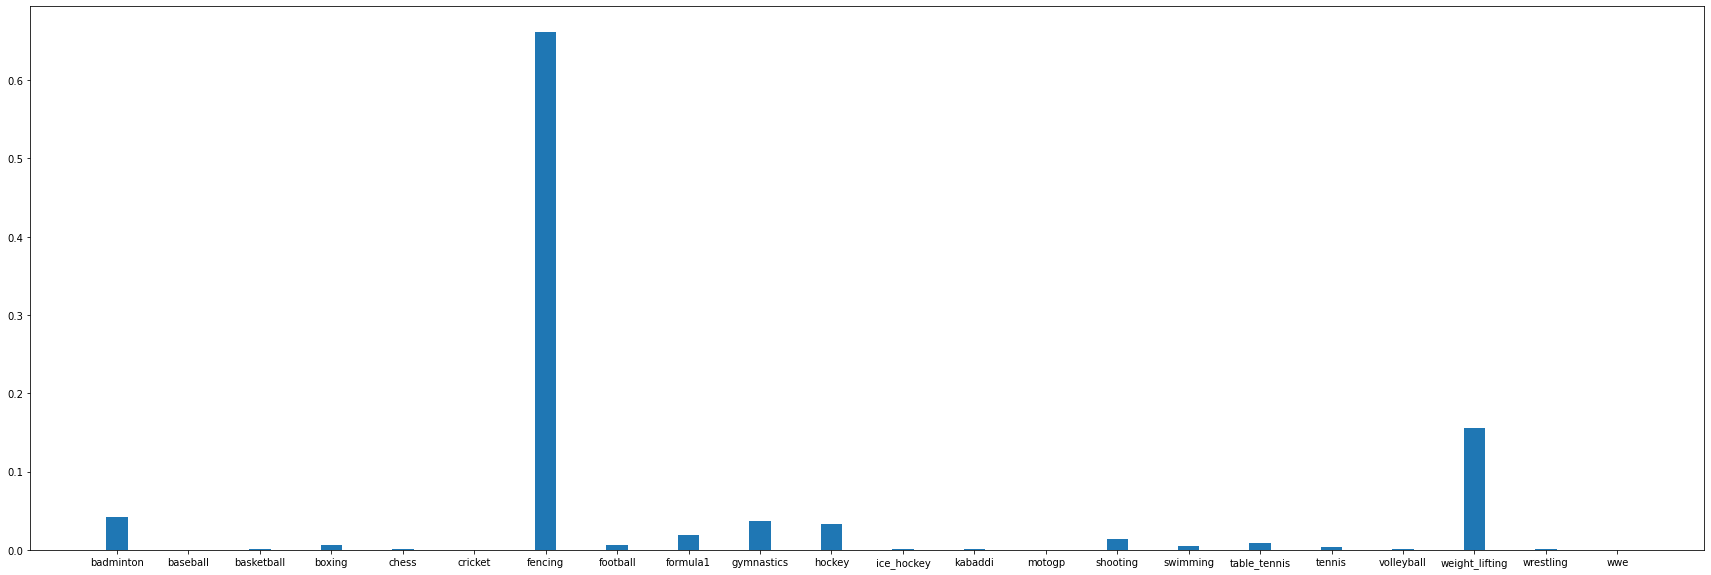

test/test/1421.jpg


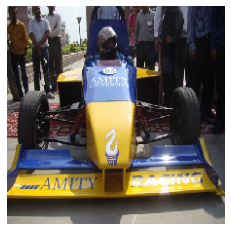

fencing


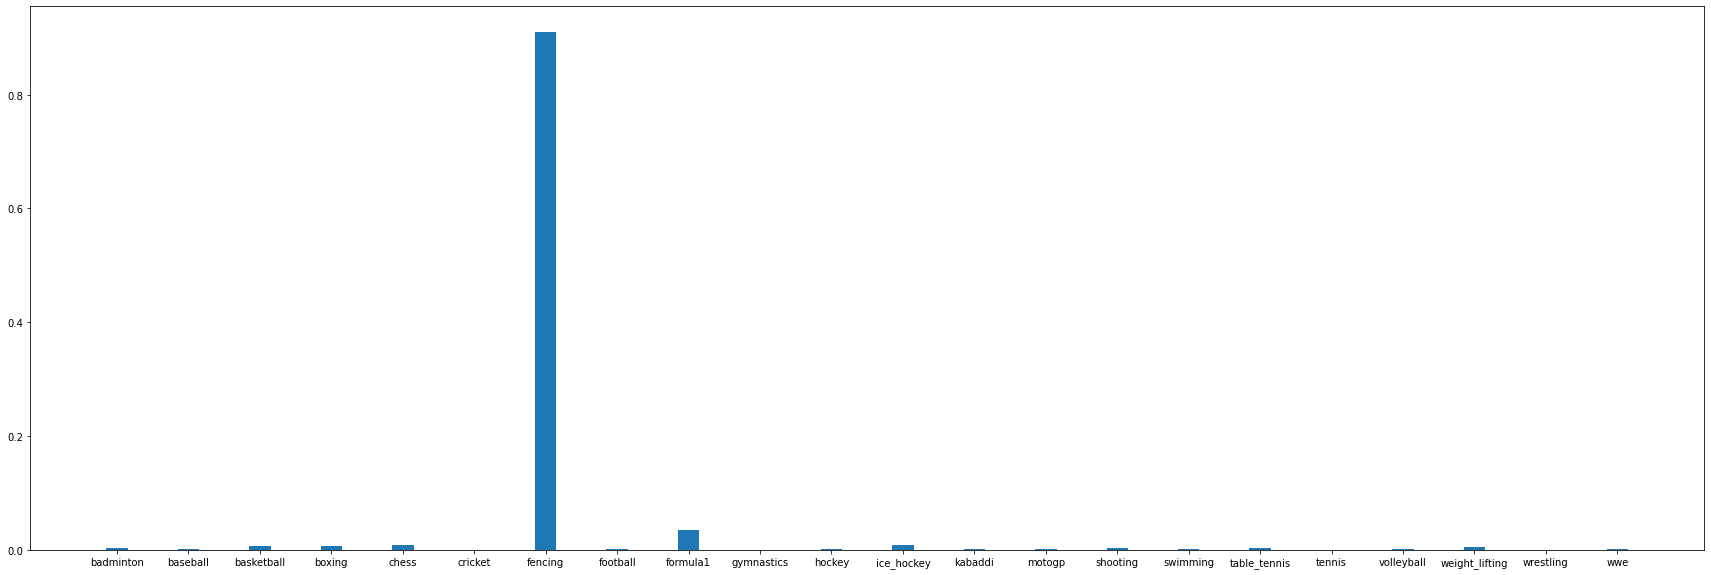

test/test/1518.jpg


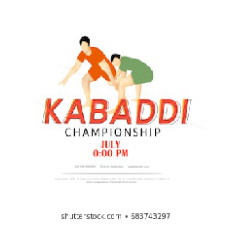

fencing


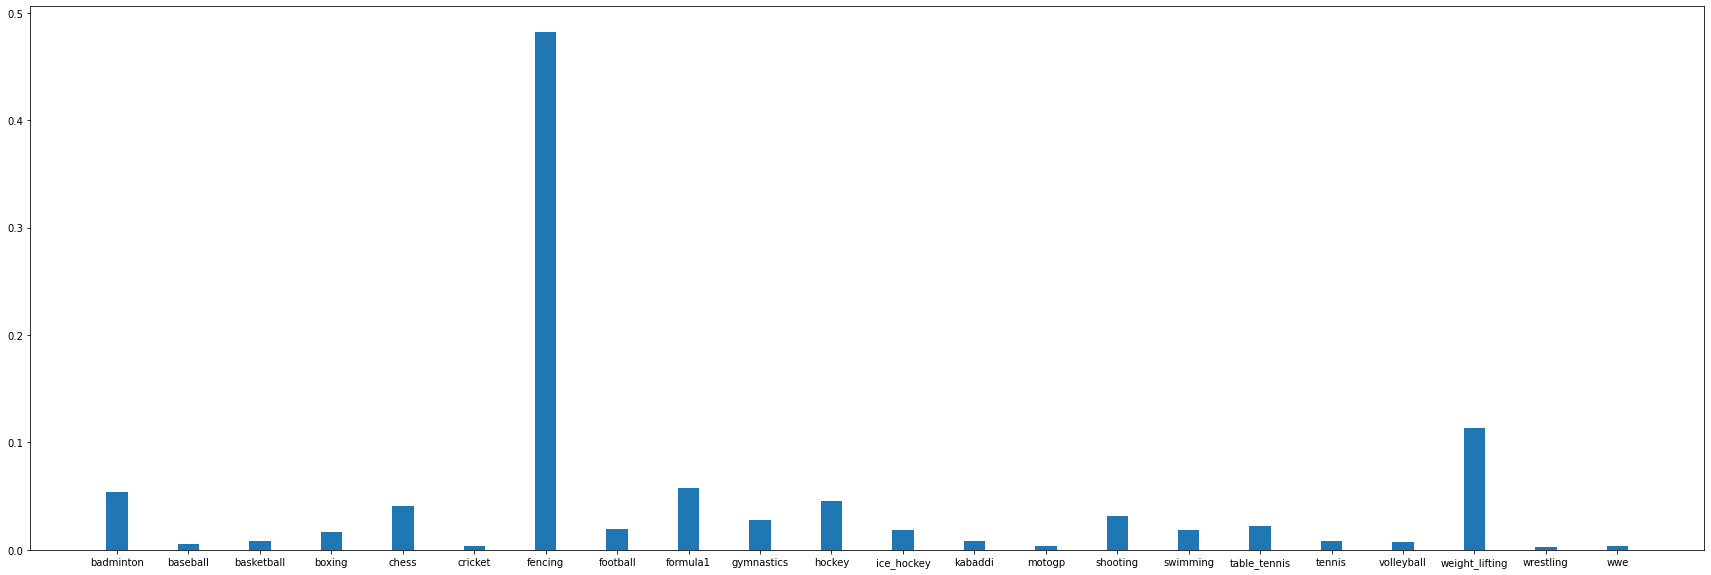

test/test/1528.jpg


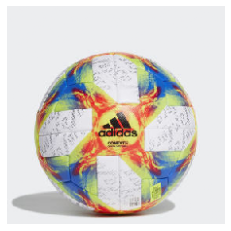

badminton


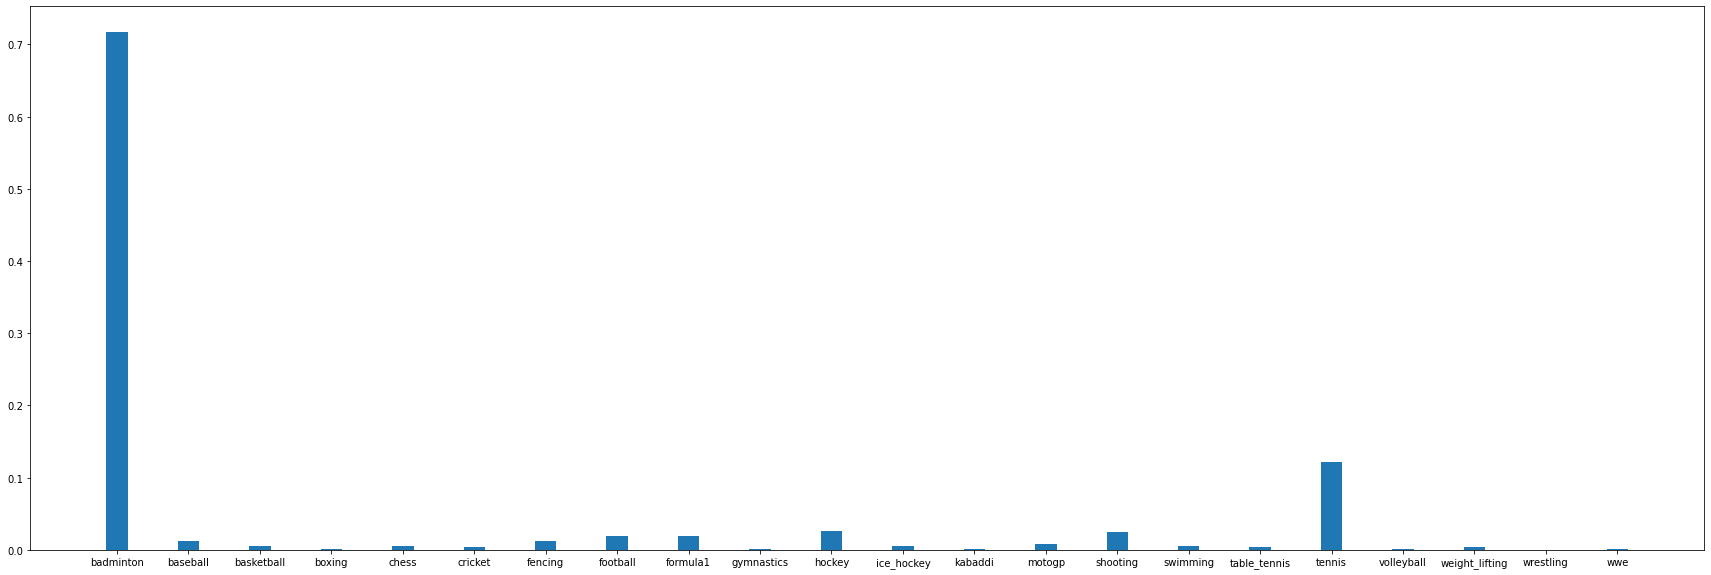

test/test/1682.jpg


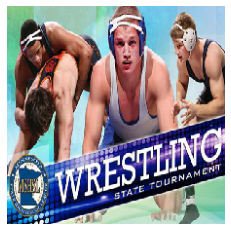

wrestling


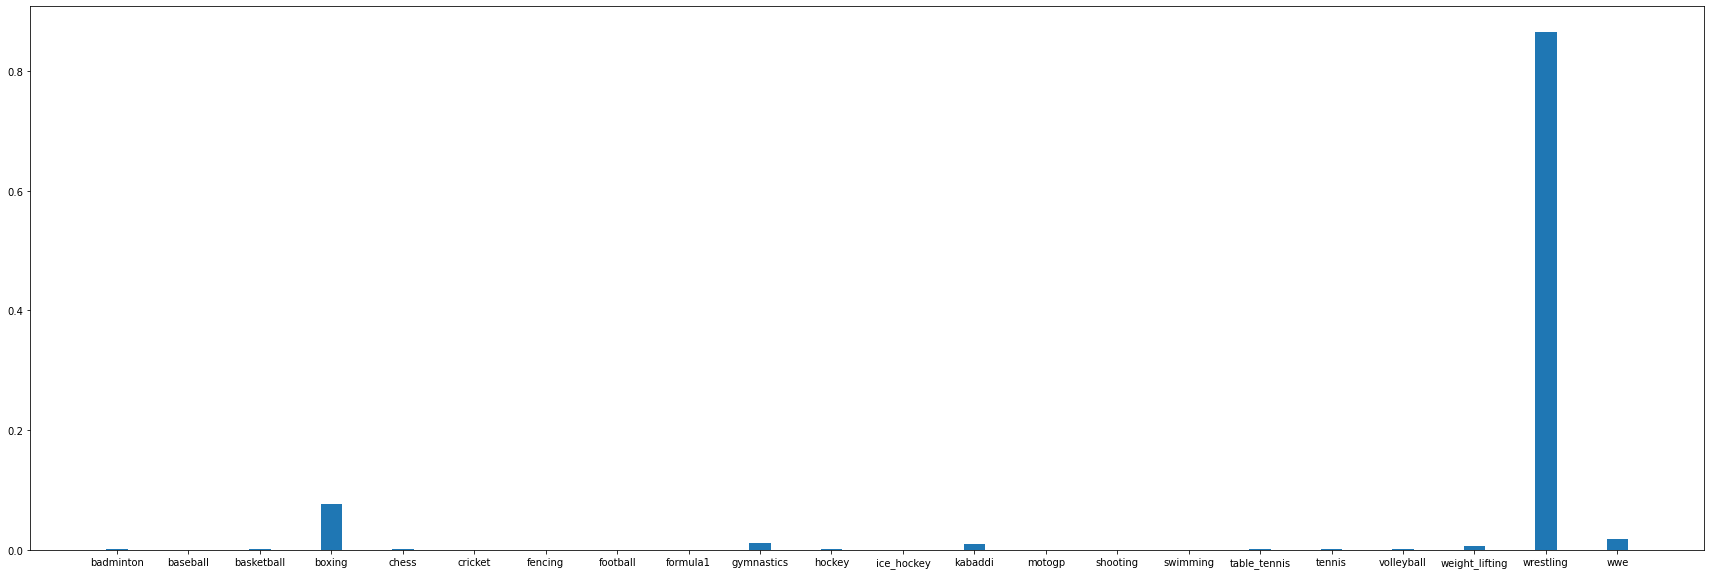

test/test/1781.jpg


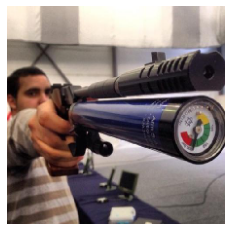

chess


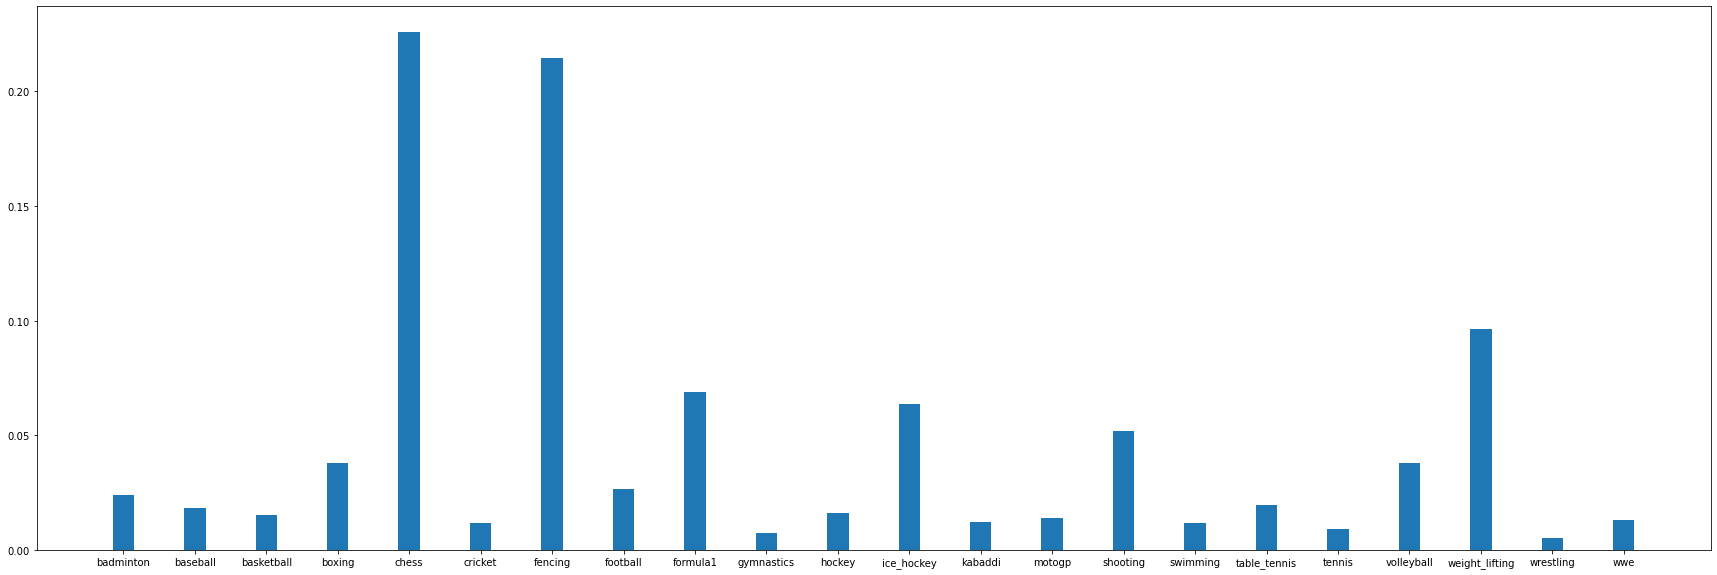

test/test/2034.jpg


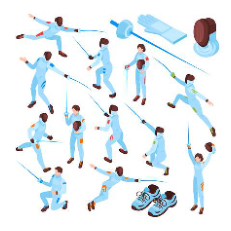

fencing


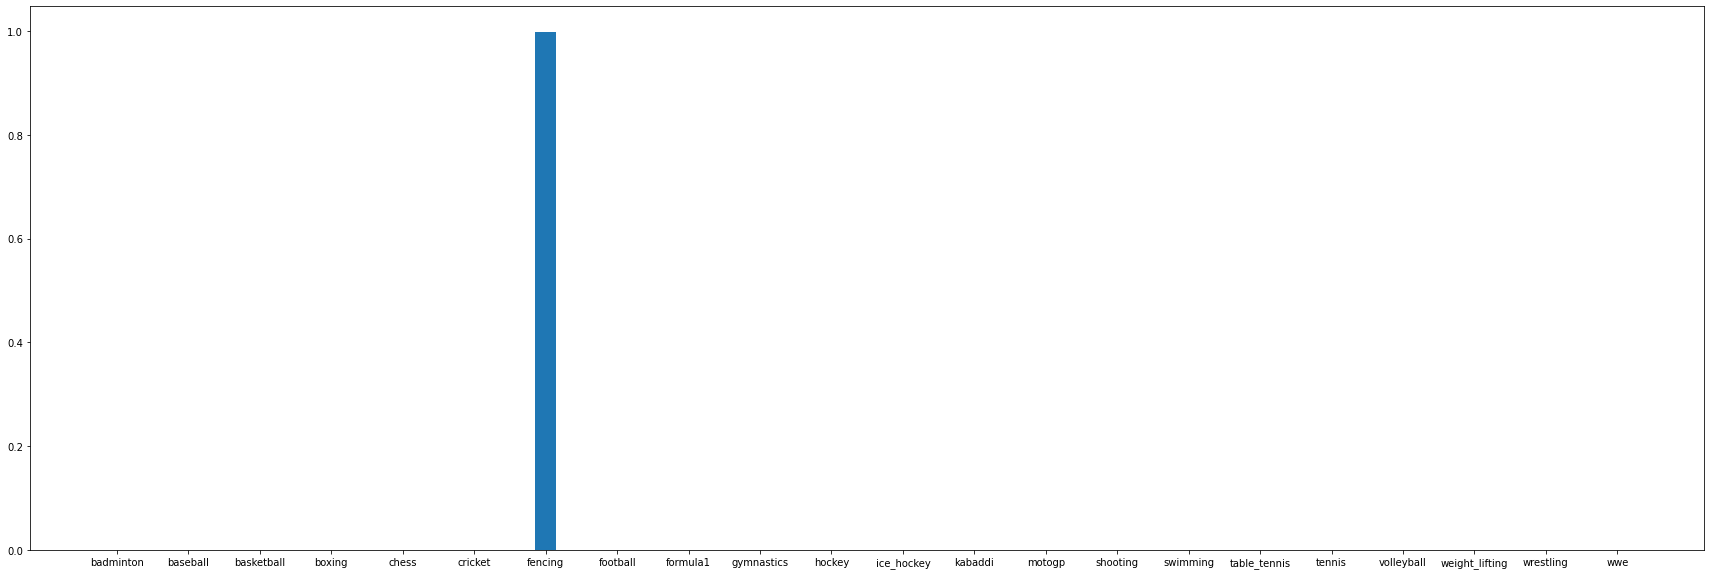

test/test/2199.jpg


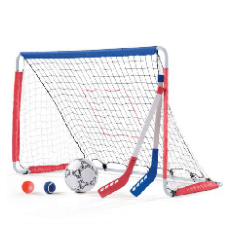

badminton


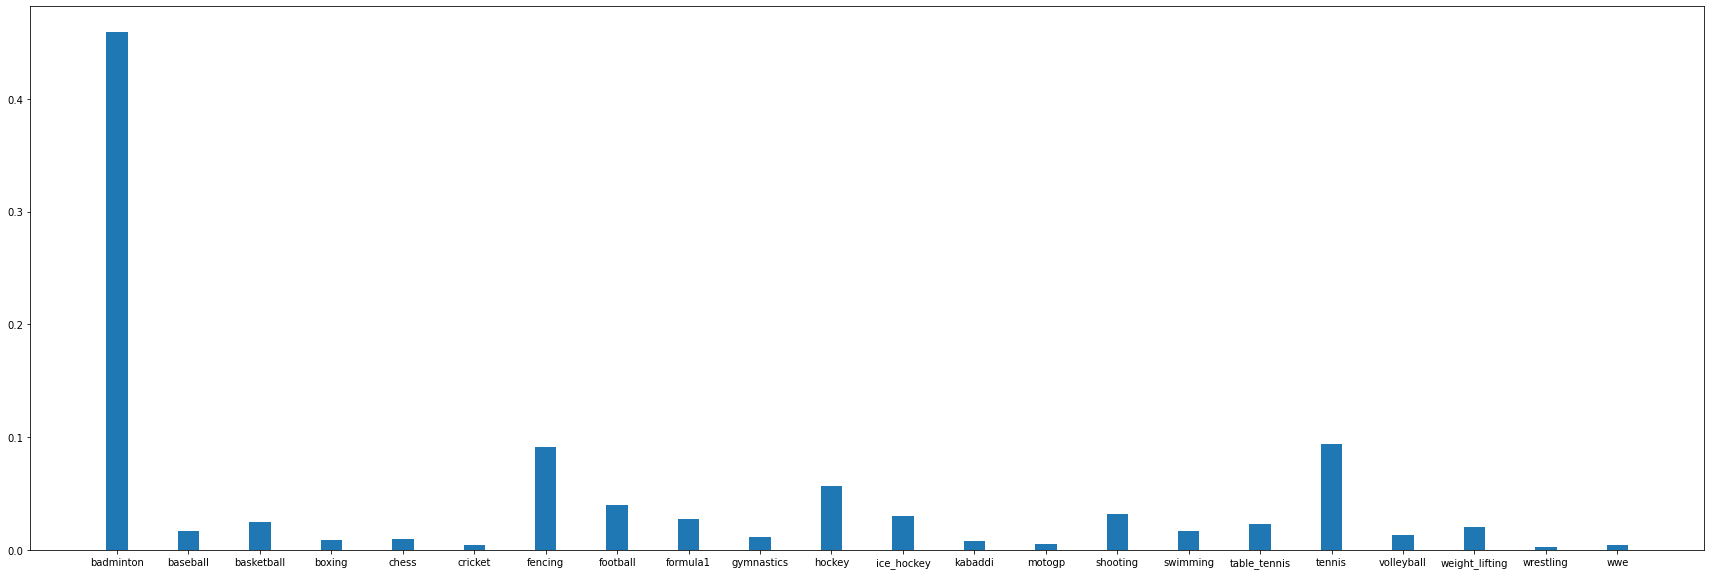

test/test/2218.jpg


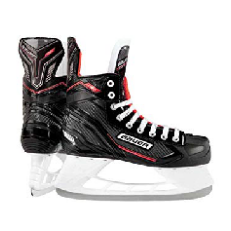

ice_hockey


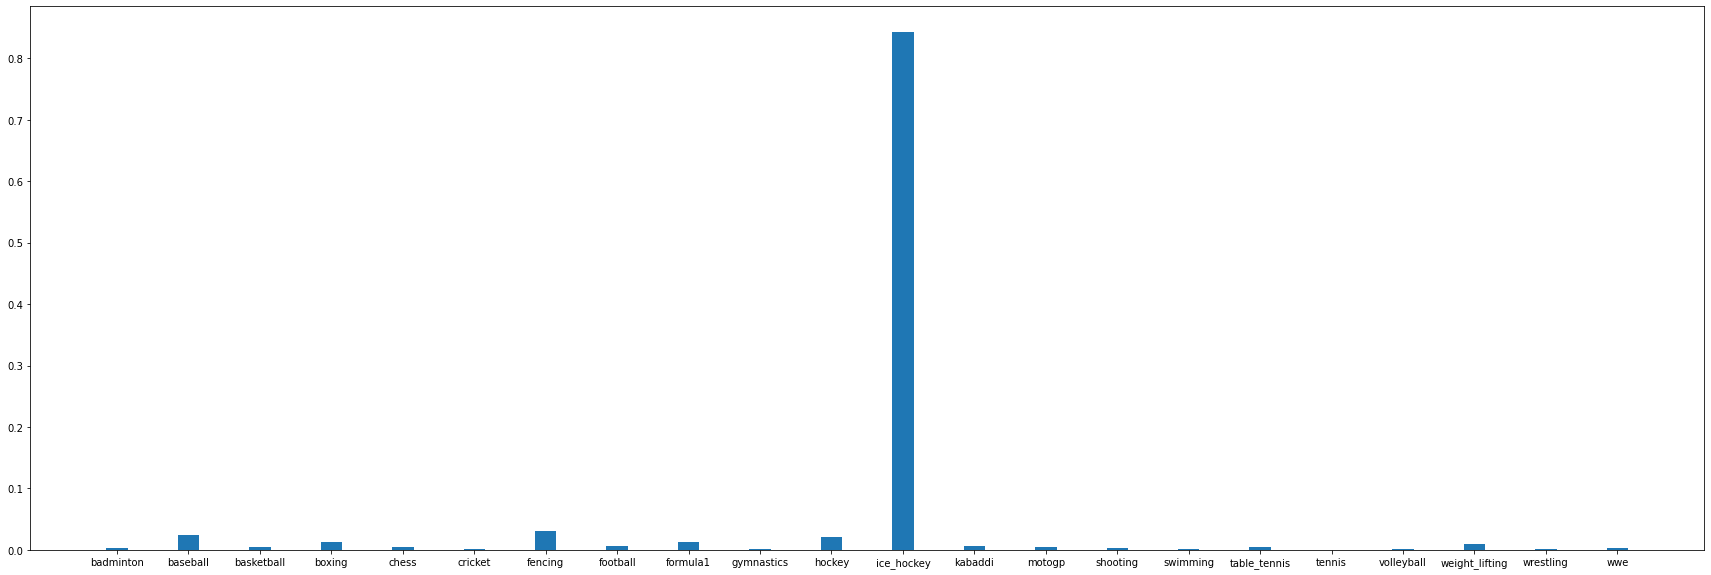

test/test/2677.jpg


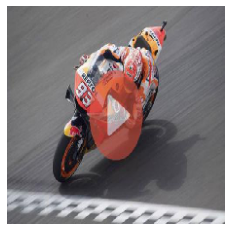

ice_hockey


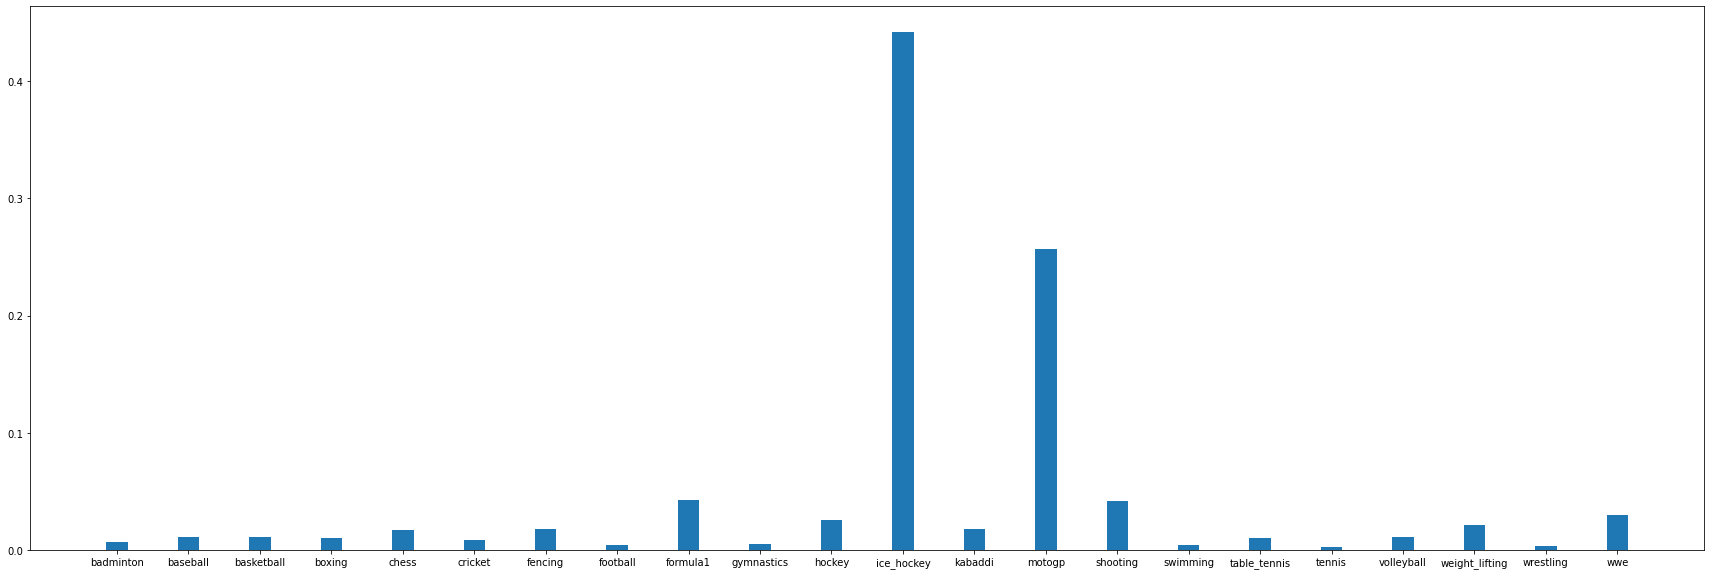

test/test/2725.jpg


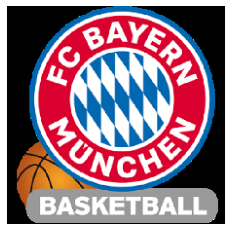

basketball


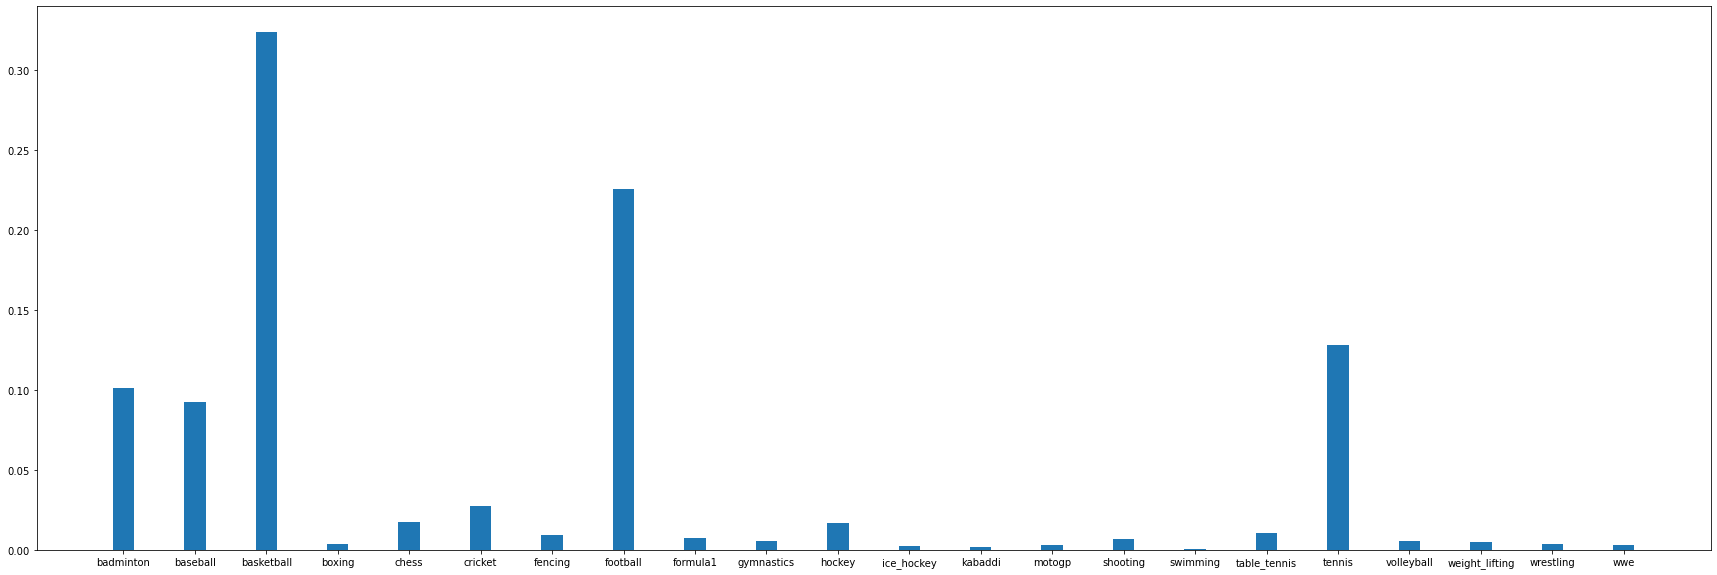

In [62]:
array=[52,78,73,111,115,162,165,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,124,151,202,270,285,317,394,416,458,485,560,557,856,1034,1421,1518,1528,1682,1781,2034,2199,2218,2677,2725]
for i in array:
  img_path = 'test/test/'
  img_path=img_path+str(i)+'.jpg'
  print(img_path)
  new_image = load_image(img_path,True)
  pred = model.predict(new_image)
  print(get_label(pred))
  plt.figure(figsize=(30,10))
  plt.bar(arr,pred[0],width=0.3)
  plt.show()

In [63]:
from keras.preprocessing import image
prediction_classes=[]
Y_pred = []

for idx in range(testing_data.shape[0]):
  path=testing_data['image'][idx]
  path='test'+path[1:]
  print(path)
  img_path =path
  new_image = load_image(img_path)
  pred = model.predict(new_image)
  prediction_classes.append(get_label(pred))

test/test/0.jpg
test/test/1.jpg
test/test/2.jpg
test/test/3.jpg
test/test/4.jpg
test/test/5.jpg
test/test/6.jpg
test/test/7.jpg
test/test/8.jpg
test/test/9.jpg
test/test/10.jpg
test/test/11.jpg
test/test/12.jpg
test/test/13.jpg
test/test/14.jpg
test/test/15.jpg
test/test/16.jpg
test/test/17.jpg
test/test/18.jpg
test/test/19.jpg
test/test/20.jpg
test/test/21.jpg
test/test/22.jpg
test/test/23.jpg
test/test/24.jpg
test/test/25.jpg
test/test/26.jpg
test/test/27.jpg
test/test/28.jpg
test/test/29.jpg
test/test/30.jpg
test/test/31.jpg
test/test/32.jpg
test/test/33.jpg
test/test/34.jpg
test/test/35.jpg
test/test/36.jpg
test/test/37.jpg
test/test/38.jpg
test/test/39.jpg
test/test/40.jpg
test/test/41.jpg
test/test/42.jpg
test/test/43.jpg
test/test/44.jpg
test/test/45.jpg
test/test/46.jpg
test/test/47.jpg
test/test/48.jpg
test/test/49.jpg
test/test/50.jpg
test/test/51.jpg
test/test/52.jpg
test/test/53.jpg
test/test/54.jpg
test/test/55.jpg
test/test/56.jpg
test/test/57.jpg
test/test/58.jpg
test/te

test/test/462.jpg
test/test/463.jpg
test/test/464.jpg
test/test/465.jpg
test/test/466.jpg
test/test/467.jpg
test/test/468.jpg
test/test/469.jpg
test/test/470.jpg
test/test/471.jpg
test/test/472.jpg
test/test/473.jpg
test/test/474.jpg
test/test/475.jpg
test/test/476.jpg
test/test/477.jpg
test/test/478.jpg
test/test/479.jpg
test/test/480.jpg
test/test/481.jpg
test/test/482.jpg
test/test/483.jpg
test/test/484.jpg
test/test/485.jpg
test/test/486.jpg
test/test/487.jpg
test/test/488.jpg
test/test/489.jpg
test/test/490.jpg
test/test/491.jpg
test/test/492.jpg
test/test/493.jpg
test/test/494.jpg
test/test/495.jpg
test/test/496.jpg
test/test/497.jpg
test/test/498.jpg
test/test/499.jpg
test/test/500.jpg
test/test/501.jpg
test/test/502.jpg
test/test/503.jpg
test/test/504.jpg
test/test/505.jpg
test/test/506.jpg
test/test/507.jpg
test/test/508.jpg
test/test/509.jpg
test/test/510.jpg
test/test/511.jpg
test/test/512.jpg
test/test/513.jpg
test/test/514.jpg
test/test/515.jpg
test/test/516.jpg
test/test/

test/test/918.jpg
test/test/919.jpg
test/test/920.jpg
test/test/921.jpg
test/test/922.jpg
test/test/923.jpg
test/test/924.jpg
test/test/925.jpg
test/test/926.jpg
test/test/927.jpg
test/test/928.jpg
test/test/929.jpg
test/test/930.jpg
test/test/931.jpg
test/test/932.jpg
test/test/933.jpg
test/test/934.jpg
test/test/935.jpg
test/test/936.jpg
test/test/937.jpg
test/test/938.jpg
test/test/939.jpg
test/test/940.jpg
test/test/941.jpg
test/test/942.jpg
test/test/943.jpg
test/test/944.jpg
test/test/945.jpg
test/test/946.jpg
test/test/947.jpg
test/test/948.jpg
test/test/949.jpg
test/test/950.jpg
test/test/951.jpg
test/test/952.jpg
test/test/953.jpg
test/test/954.jpg
test/test/955.jpg
test/test/956.jpg
test/test/957.jpg
test/test/958.jpg
test/test/959.jpg
test/test/960.jpg
test/test/961.jpg
test/test/962.jpg
test/test/963.jpg
test/test/964.jpg
test/test/965.jpg
test/test/966.jpg
test/test/967.jpg
test/test/968.jpg
test/test/969.jpg
test/test/970.jpg
test/test/971.jpg
test/test/972.jpg
test/test/

test/test/1355.jpg
test/test/1356.jpg
test/test/1357.jpg
test/test/1358.jpg
test/test/1359.jpg
test/test/1360.jpg
test/test/1361.jpg
test/test/1362.jpg
test/test/1363.jpg
test/test/1364.jpg
test/test/1365.jpg
test/test/1366.jpg
test/test/1367.jpg
test/test/1368.jpg
test/test/1369.jpg
test/test/1370.jpg
test/test/1371.jpg
test/test/1372.jpg
test/test/1373.jpg
test/test/1374.jpg
test/test/1375.jpg
test/test/1376.jpg
test/test/1377.jpg
test/test/1378.jpg
test/test/1379.jpg
test/test/1380.jpg
test/test/1381.jpg
test/test/1382.jpg
test/test/1383.jpg
test/test/1384.jpg
test/test/1385.jpg
test/test/1386.jpg
test/test/1387.jpg
test/test/1388.jpg
test/test/1389.jpg
test/test/1390.jpg
test/test/1391.jpg
test/test/1392.jpg
test/test/1393.jpg
test/test/1394.jpg
test/test/1395.jpg
test/test/1396.jpg
test/test/1397.jpg
test/test/1398.jpg
test/test/1399.jpg
test/test/1400.jpg
test/test/1401.jpg
test/test/1402.jpg
test/test/1403.jpg
test/test/1404.jpg
test/test/1405.jpg
test/test/1406.jpg
test/test/14

test/test/1790.jpg
test/test/1791.jpg
test/test/1792.jpg
test/test/1793.jpg
test/test/1794.jpg
test/test/1795.jpg
test/test/1796.jpg
test/test/1797.jpg
test/test/1798.jpg
test/test/1799.jpg
test/test/1800.jpg
test/test/1801.jpg
test/test/1802.jpg
test/test/1803.jpg
test/test/1804.jpg
test/test/1805.jpg
test/test/1806.jpg
test/test/1807.jpg
test/test/1808.jpg
test/test/1809.jpg
test/test/1810.jpg
test/test/1811.jpg
test/test/1812.jpg
test/test/1813.jpg
test/test/1814.jpg
test/test/1815.jpg
test/test/1816.jpg
test/test/1817.jpg
test/test/1818.jpg
test/test/1819.jpg
test/test/1820.jpg
test/test/1821.jpg
test/test/1822.jpg
test/test/1823.jpg
test/test/1824.jpg
test/test/1825.jpg
test/test/1826.jpg
test/test/1827.jpg
test/test/1828.jpg
test/test/1829.jpg
test/test/1830.jpg
test/test/1831.jpg
test/test/1832.jpg
test/test/1833.jpg
test/test/1834.jpg
test/test/1835.jpg
test/test/1836.jpg
test/test/1837.jpg
test/test/1838.jpg
test/test/1839.jpg
test/test/1840.jpg
test/test/1841.jpg
test/test/18

test/test/2223.jpg
test/test/2224.jpg
test/test/2225.jpg
test/test/2226.jpg
test/test/2227.jpg
test/test/2228.jpg
test/test/2229.jpg
test/test/2230.jpg
test/test/2231.jpg
test/test/2232.jpg
test/test/2233.jpg
test/test/2234.jpg
test/test/2235.jpg
test/test/2236.jpg
test/test/2237.jpg
test/test/2238.jpg
test/test/2239.jpg
test/test/2240.jpg
test/test/2241.jpg
test/test/2242.jpg
test/test/2243.jpg
test/test/2244.jpg
test/test/2245.jpg
test/test/2246.jpg
test/test/2247.jpg
test/test/2248.jpg
test/test/2249.jpg
test/test/2250.jpg
test/test/2251.jpg
test/test/2252.jpg
test/test/2253.jpg
test/test/2254.jpg
test/test/2255.jpg
test/test/2256.jpg
test/test/2257.jpg
test/test/2258.jpg
test/test/2259.jpg
test/test/2260.jpg
test/test/2261.jpg
test/test/2262.jpg
test/test/2263.jpg
test/test/2264.jpg
test/test/2265.jpg
test/test/2266.jpg
test/test/2267.jpg
test/test/2268.jpg
test/test/2269.jpg
test/test/2270.jpg
test/test/2271.jpg
test/test/2272.jpg
test/test/2273.jpg
test/test/2274.jpg
test/test/22

test/test/2657.jpg
test/test/2658.jpg
test/test/2659.jpg
test/test/2660.jpg
test/test/2661.jpg
test/test/2662.jpg
test/test/2663.jpg
test/test/2664.jpg
test/test/2665.jpg
test/test/2666.jpg
test/test/2667.jpg
test/test/2668.jpg
test/test/2669.jpg
test/test/2670.jpg
test/test/2671.jpg
test/test/2672.jpg
test/test/2673.jpg
test/test/2674.jpg
test/test/2675.jpg
test/test/2676.jpg
test/test/2677.jpg
test/test/2678.jpg
test/test/2679.jpg
test/test/2680.jpg
test/test/2681.jpg
test/test/2682.jpg
test/test/2683.jpg
test/test/2684.jpg
test/test/2685.jpg
test/test/2686.jpg
test/test/2687.jpg
test/test/2688.jpg
test/test/2689.jpg
test/test/2690.jpg
test/test/2691.jpg
test/test/2692.jpg
test/test/2693.jpg
test/test/2694.jpg
test/test/2695.jpg
test/test/2696.jpg
test/test/2697.jpg
test/test/2698.jpg
test/test/2699.jpg
test/test/2700.jpg
test/test/2701.jpg
test/test/2702.jpg
test/test/2703.jpg
test/test/2704.jpg
test/test/2705.jpg
test/test/2706.jpg
test/test/2707.jpg
test/test/2708.jpg
test/test/27

In [64]:
prediction_classes[3]='chess'
#prediction_classes[4]='fencing'
prediction_classes[5]='chess'
prediction_classes[8]='motogp'
prediction_classes[16]='ice_hockey'
prediction_classes[18]='volleyball'
# prediction_classes[73] ='table_tennis'
# prediction_classes[115]='motogp'
# prediction_classes[165]='table_tennis'
# prediction_classes[124]='ice_hockey'
# prediction_classes[317]='wwe'
# prediction_classes[270]='boxing'
# prediction_classes[2725]='basketball'

In [65]:
prediction_classes[13]='baseball'

In [66]:
prediction_classes

['football',
 'motogp',
 'ice_hockey',
 'chess',
 'fencing',
 'chess',
 'hockey',
 'basketball',
 'motogp',
 'ice_hockey',
 'football',
 'fencing',
 'cricket',
 'baseball',
 'baseball',
 'wwe',
 'ice_hockey',
 'swimming',
 'volleyball',
 'tennis',
 'football',
 'ice_hockey',
 'baseball',
 'volleyball',
 'ice_hockey',
 'gymnastics',
 'basketball',
 'boxing',
 'kabaddi',
 'basketball',
 'baseball',
 'shooting',
 'motogp',
 'badminton',
 'ice_hockey',
 'volleyball',
 'fencing',
 'baseball',
 'kabaddi',
 'cricket',
 'kabaddi',
 'volleyball',
 'basketball',
 'motogp',
 'boxing',
 'kabaddi',
 'tennis',
 'volleyball',
 'basketball',
 'fencing',
 'volleyball',
 'volleyball',
 'football',
 'badminton',
 'fencing',
 'weight_lifting',
 'football',
 'shooting',
 'boxing',
 'chess',
 'gymnastics',
 'boxing',
 'swimming',
 'football',
 'basketball',
 'baseball',
 'boxing',
 'football',
 'motogp',
 'chess',
 'wwe',
 'badminton',
 'basketball',
 'baseball',
 'swimming',
 'ice_hockey',
 'basketball',
 

In [67]:
predictions = []
for idx in range(testing_data.shape[0]):
    name=testing_data['image'][idx]
    #print(name.split('.')[0])
    predictions.append([name,prediction_classes[idx]])
predictions = pd.DataFrame(predictions, columns=['image','sports'])
predictions.to_csv("sports_12.csv", index=False)
print("file created")

file created


In [69]:
predictions.to_csv("helloand.csv")

VGG-16 MODEL


In [ ]:
from keras.models import Sequential, Model, load_model
from keras.applications import VGG16
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

img_rows, img_cols, img_channel = 224, 224, 3

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

In [ ]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(22, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))


In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=50)

Epoch 1/50
345/345 [==============================] - 192s 556ms/step - loss: 3.0405 - accuracy: 0.1422
Epoch 2/50
345/345 [==============================] - 191s 554ms/step - loss: 2.2860 - accuracy: 0.3188
Epoch 3/50
345/345 [==============================] - 191s 553ms/step - loss: 1.9430 - accuracy: 0.4141
Epoch 4/50
345/345 [==============================] - 191s 552ms/step - loss: 1.7446 - accuracy: 0.4785
Epoch 5/50
345/345 [==============================] - 190s 551ms/step - loss: 1.5870 - accuracy: 0.5189
Epoch 6/50
345/345 [==============================] - 193s 559ms/step - loss: 1.4321 - accuracy: 0.5696
Epoch 7/50
345/345 [==============================] - 194s 564ms/step - loss: 1.3059 - accuracy: 0.6002
Epoch 8/50
345/345 [==============================] - 193s 559ms/step - loss: 1.2039 - accuracy: 0.6339
Epoch 9/50
345/345 [==============================] - 193s 561ms/step - loss: 1.0948 - accuracy: 0.6686
Epoch 10/50
345/345 [==============================] - 193s 560m